## Texas

In [105]:

TTXQartMeansDaily= TXQartMeansDaily.T
TTXQartMeansDaily
TXQartMeansDaily.to_csv("D:/Research/Texas_drought/RadarTexas/Variables/GRAPHS_Excel/TransposedTXDaily.csv") 

In [1]:
## 1 patch together existing TX data- ann lvod & trends, and explan data-- left join drops all other records
#TODO addin ecoregions and do groupby as well
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np 
#list(TXlvodexplanmonthly)
#t.shape
#list(t)
#t[0:10]
#Amanda's orig. canopy loss file-- (id), lat, long, dead, alive
LVODDaily = pd.read_csv(r"D:\Research\Texas_drought\RadarTexas\Variables\FromPython\AllCells2020\LVOD_Daily_DESCASC.csv") 
LVODDaily.set_index(['ID'])
TxCells = pd.read_csv(r"D:/Research/Texas_drought/RadarTexas/Variables/FromPython/ALLCells2020/TX_xy_death1118rec.csv")
TxCells.set_index(['ID'])

Tx_daily = pd.merge(TxCells, LVODDaily, how='left', on='ID')                     
print(Tx_daily)


         ID     alive      dead  Quartile  20100113  20100114  20100115  \
0      9846  0.230589  0.000000         1       NaN       NaN       NaN   
1      8934  0.020677  0.000000         1       NaN       NaN       NaN   
2      8816  0.033910  0.000000         1       NaN       NaN       NaN   
3     10089  0.049264  0.000000         1       NaN       NaN       NaN   
4     10886  0.001000  0.000000         1       NaN       NaN       NaN   
...     ...       ...       ...       ...       ...       ...       ...   
1013  12102  0.551698  0.440733         4       NaN       NaN       NaN   
1014  11104  0.746385  0.465010         4       NaN       NaN       NaN   
1015  12106  0.673358  0.477385         4       NaN       NaN       NaN   
1016  11992  0.908686  0.486104         4       NaN       NaN       NaN   
1017  11988  0.790849  0.563124         4       NaN       NaN       NaN   

      20100116  20100117  20100118  ...  20180621  20180622  20180623  \
0          NaN       NaN  

In [106]:
Tx_daily

,ID,alive,dead,Quartile,20100113,20100114,20100115,20100116,20100117,20100118,...,20180621,20180622,20180623,20180624,20180625,20180626,20180627,20180628,20180629,20180630
0,9846,0.230589,0.000000,1,NaN,NaN,NaN,NaN,NaN,NaN,...,0.009392,0.016139,0.009392,0.005547,0.005547,0.001703,0.005547,0.005547,0.008874,0.008874
1,8934,0.020677,0.000000,1,NaN,NaN,NaN,NaN,NaN,NaN,...,0.011796,0.011796,0.012417,0.011796,0.011796,0.000968,0.000968,0.000484,0.000000,0.000000
2,8816,0.033910,0.000000,1,NaN,NaN,NaN,NaN,NaN,NaN,...,0.017778,0.017778,0.021362,0.021846,0.021846,0.017778,0.017778,0.021362,0.021362,0.021362
3,10089,0.049264,0.000000,1,NaN,NaN,NaN,NaN,NaN,NaN,...,0.060333,0.059941,0.059550,0.058524,0.058524,0.057497,0.058524,0.057497,0.049621,0.049621
4,10886,0.001000,0.000000,1,NaN,NaN,NaN,NaN,NaN,NaN,...,0.061780,0.076526,0.076526,0.079536,0.079536,0.076526,0.079536,0.079536,0.076526,0.076526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013,12102,0.551698,0.440733,4,NaN,NaN,NaN,NaN,NaN,NaN,...,0.156053,0.156908,0.156908,0.160477,0.156908,0.156908,0.143852,0.143852,0.150380,0.143852
1014,11104,0.746385,0.465010,4,NaN,NaN,NaN,NaN,NaN,NaN,...,0.124105,0.119256,0.119256,0.119256,0.119256,0.114207,0.109157,0.109157,0.119256,0.118244
1015,12106,0.673358,0.477385,4,NaN,NaN,NaN,NaN,NaN,NaN,...,0.121038,0.123063,0.123063,0.129866,0.134645,0.129866,0.151602,0.151602,0.168559,0.168559
1016,11992,0.908686,0.486104,4,NaN,NaN,NaN,NaN,NaN,NaN,...,0.137127,0.141389,0.141389,0.153336,0.161022,0.153336,0.161022,0.161022,0.165928,0.161022


In [69]:
## 2  peel everything else off, including 2010: 252] and calculate means by date-- should do this by ecosystem/region too...
TxDailyno2010 = Tx_daily[Tx_daily.columns[357:3095]]
#peel off Quantile
Q = Tx_daily[Tx_daily.columns[3]]
#join them back
Tx_dailybasic = pd.concat([Q, TxDailyno2010], axis=1)
#average them by quartile
TXQartMeansDaily = Tx_dailybasic.groupby('Quartile').mean()
TXQartstdDaily = Tx_dailybasic.groupby('Quartile').std()
TXQartMeansDaily
TXQartstdDaily


,20110101,20110102,20110103,20110104,20110105,20110106,20110107,20110108,20110109,20110110,...,20180621,20180622,20180623,20180624,20180625,20180626,20180627,20180628,20180629,20180630
Quartile,,,,,,,,,,,,,,,,,,,,,
1,0.097513,0.095989,0.099873,0.091293,0.090289,0.083213,0.083266,0.082396,0.081990,0.083650,...,0.104776,0.102603,0.104534,0.103049,0.102399,0.102466,0.101787,0.103287,0.103082,0.102883
2,0.092388,0.092769,0.091966,0.091866,0.091382,0.091226,0.091312,0.089558,0.084262,0.083827,...,0.128346,0.128862,0.129346,0.129483,0.128386,0.128407,0.128429,0.128140,0.127515,0.128339
3,0.119172,0.116970,0.117960,0.122336,0.122516,0.124424,0.124429,0.122819,0.120531,0.123565,...,0.165639,0.166508,0.166899,0.166379,0.165600,0.165920,0.167315,0.167223,0.166282,0.166703
4,0.081822,0.081006,0.082717,0.083016,0.083801,0.085195,0.084996,0.085917,0.085440,0.085323,...,0.123716,0.124133,0.124424,0.122923,0.120937,0.121126,0.123454,0.123825,0.122520,0.123578


In [101]:
TXQartMeansDaily.to_csv("D:\Research\Texas_drought\RadarTexas\Variables\GRAPHS_Excel\TXDailyMeansByLossQuartile.csv")
TXQartstdDaily.to_csv("D:\Research\Texas_drought\RadarTexas\Variables\GRAPHS_Excel\TXDailySTDByLossQuartile.csv")

#x="Quartile", y="1",   https://seaborn.pydata.org/examples/errorband_lineplots.html
#data = TTxQaurtMeansDaily[2011001:2018601]
#sns.lineplot(hue="region", style="event",
#             data=TTxQaurtMeansDaily)

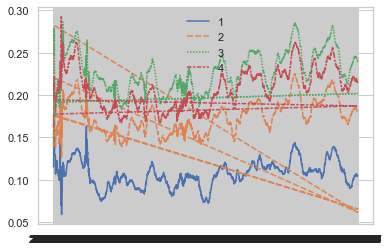

In [46]:
# FYI  seaborn wide form plotting, testing stuff... 
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")
#load dataset in long form

#fmri = sns.load_dataset("TTxQaurtMeansDaily")
#data = TTxQaurtMeansDaily[2011001:2018601]
sns.lineplot(hue="region", style="event",
             data=TTxQaurtMeansDaily)

#-----------------------------
#values = TXQartMeansDaily.randn(365, 4).cumsum(axis=0)
#dates = pd.date_range("1 1 2016", periods=365, freq="D")
#data = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"])
#data = data.rolling(7).mean()

#sns.lineplot(data=data, palette="tab10", linewidth=2.5)

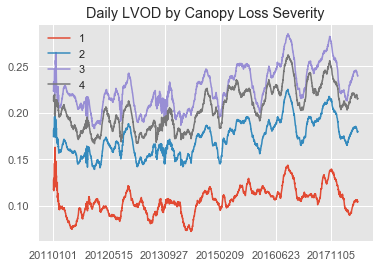

In [98]:
#PLOTTING TX over time #transpose to longform
TTxQaurtMeansDaily = TXQartMeansDaily.T
plt.style.use('ggplot')
#TODO: plot from jan 2011 on; what is the outlier in early 2011?, change colors, change date legends- only plot tics ever 365
#fig=plt.figure(data=TTxQaurtMeansDaily, figsize=(9, 3));  plt.legend(loc='best'); 
#ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes#ax.plot(x, y)
#set_xlabel(‘Year’)
#ax.set_xticks([0,365,730,1095,1460,1825,2190,2555, 2910])
#ax.set_xticklabels(['2011','2012','2013','2014','2015','2016','2017','2018','2019'])
TTxQaurtMeansDaily.plot(fig=(10, 2), x_compat=True, title="Daily LVOD by Canopy Loss Severity") 
plt.legend(loc='best') 
#set_xticks([0,365,730,1095,1460,1825,2190,2555, 2910])
#set_xticklabels(['2011','2012','2013','2014','2015','2016','2017','2018','2019'])
plt.show()
#sns.lineplot(x="timepoint", y="signal",
#             hue="region", style="event",
#             data=fmri)

ValueError: Unrecognized character Q in format string

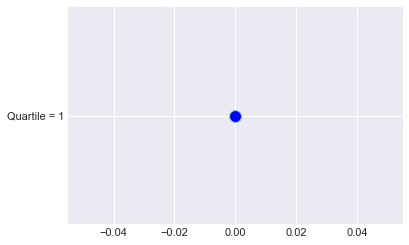

In [21]:
#PLOTTING TX over time

#TXQartMeansDaily.set_index(TXQartMeansDaily.index).T.plot().legend(loc='center left', title="Daily LVOD by Quantile", bbox_to_anchor=(1, 0.5))
#plt.axis(['2015-01', '2016-01', 0, .9])

 
# Data
#df=pd.TXQartMeansDaily({'x': range(1,11), 'y1': np.random.randn(10), 'y2': np.random.randn(10)+range(1,11), 'y3': np.random.randn(10)+range(11,21) })

# style
plt.style.use('seaborn-darkgrid')

# create a color palette
palette = plt.get_cmap('Set1')
 
# multiple line plot
plt.plot('Quartile = 1', data=TXQartMeansDaily, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'x', 'Quartile = 2', data=TXQartMeansDaily, marker='', color='olive', linewidth=2)
plt.plot( 'x', 'Quartile = 3', data=TXQartMeansDaily, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
plt.legend()

# Add titles
plt.title("Relative Water Content phenology for different levels of canopy loss", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Time")
plt.ylabel("RWC")
 
#----------------------------
#alternate-- 
 
# multiple line plot
#num=0
#for column in df.drop('x', axis=1):
#num+=1
#plt.plot(df['x'], df[column], marker='', color=palette(num), linewidth=1, alpha=0.9, label=column)
 
# Add legend
#plt.legend(loc=2, ncol=2)
 
#    -------------------------
    
 #   lvod_explancomp[lvod_explancomp.columns].plot.scatter('FRAG','ForPercPix414243')


In [44]:
data


Quartile,1,2,3,4


In [24]:
TTxQaurtMeansDaily


Quartile,1,2,3,4
20100113,NaN,NaN,NaN,NaN
20100114,NaN,NaN,NaN,NaN
20100115,NaN,NaN,NaN,NaN
20100116,NaN,NaN,NaN,NaN
20100117,NaN,NaN,NaN,NaN
...,...,...,...,...
20180626,0.103947,0.179723,0.240632,0.214899
20180627,0.103782,0.179077,0.240401,0.214809
20180628,0.105325,0.179276,0.240259,0.214792
20180629,0.104849,0.180459,0.240574,0.215882


<Figure size 432x288 with 0 Axes>

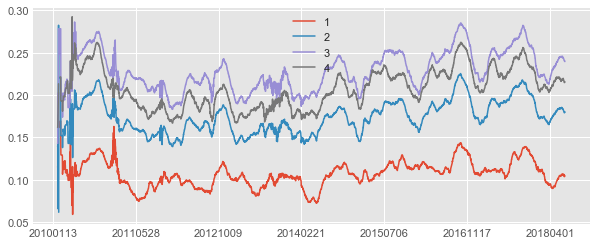

In [30]:
#Tx_dailyQ1 = TXQartMeansDaily[TXQartMeansDaily.Quartile == 1]
TTxQaurtMeansDaily = TXQartMeansDaily.T

plt.style.use('ggplot')
plt.figure(); TTxQaurtMeansDaily.plot(figsize=(10, 4)); plt.legend(loc='best')
#TODO: plot from jan 2011 on; what is the outlier in early 2011?, change colors, change date legends- only plot tics ever 365

#sns.lineplot(x="timepoint", y="signal",
#             hue="region", style="event",
#             data=fmri)

C:\Users\jswenson\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: Second argument 'y1' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\jswenson\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: Second argument 'y2' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\jswenson\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: Second argument 'y3' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  if sys.path[0] == '':


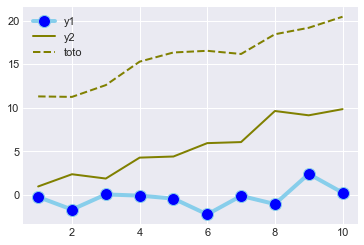

In [18]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Data
df=pd.DataFrame({'x': range(1,11), 'y1': np.random.randn(10), 'y2': np.random.randn(10)+range(1,11), 'y3': np.random.randn(10)+range(11,21) })
 
# multiple line plot
plt.plot( 'x', 'y1', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'x', 'y2', data=df, marker='', color='olive', linewidth=2)
plt.plot( 'x', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
plt.legend()


#misguided commands- that worked but did the wrong thing
#transpose
#Tx_dailyQ1 = Tx_daily[Tx_daily.Quartile == 1]
#TTx_daily = Tx_daily.T
#TTx_daily
#TTxdailyQ1basic.columns.values[1] = 'DOY'
#melted = Tx_daily.melt('year', var_name='Quantile', value_name='seats')

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
20100113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20100114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20100115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20100116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20100117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20180626,0.001703,0.000968,0.017778,0.057497,0.076526,0.071945,0.074401,0.086256,0.104351,0.081986,...,0.106320,0.218309,0.507385,0.204568,0.038534,0.000000,0.062846,0.105301,0.007630,0.232927
20180627,0.005547,0.000968,0.017778,0.058524,0.079536,0.077967,0.074662,0.094933,0.101649,0.080534,...,0.111819,0.218309,0.511838,0.204568,0.034850,0.000107,0.062846,0.105941,0.007496,0.232448
20180628,0.005547,0.000484,0.021362,0.057497,0.079536,0.077967,0.074662,0.094933,0.101649,0.070547,...,0.117318,0.228964,0.513458,0.204568,0.031165,0.000214,0.062846,0.105301,0.010157,0.232448
20180629,0.008874,0.000000,0.021362,0.049621,0.076526,0.077967,0.074662,0.085972,0.101649,0.080534,...,0.106320,0.218309,0.515077,0.212435,0.029199,0.000878,0.073046,0.102267,0.012818,0.231969


In [10]:
sns.set(style="darkgrid")
sns.lineplot(data=TXQartMeansDaily) #hue="Quartile",

ValueError: These `style` levels are missing dashes: {'20171211', '20100518', '20140927', '20140628', '20111210', '20160224', '20170721', '20131112', '20100206', '20140520', '20180123', '20130821', '20120623', '20170227', '20140226', '20130321', '20150418', '20160717', '20100622', '20100503', '20120129', '20121005', '20150923', '20110628', '20160306', '20170821', '20110702', '20120418', '20140424', '20140412', '20170308', '20180116', '20170915', '20110217', '20140417', '20130111', '20150320', '20120320', '20151122', '20130420', '20141021', '20121108', '20170930', '20171104', '20121227', '20170820', '20161025', '20140513', '20160407', '20130330', '20110410', '20100720', '20150720', '20130504', '20150830', '20101222', '20101212', '20100620', '20140608', '20131123', '20100627', '20160710', '20100721', '20160214', '20171101', '20161201', '20110309', '20101116', '20130910', '20130713', '20150416', '20170525', '20120221', '20141204', '20171208', '20151201', '20120723', '20120929', '20100918', '20110626', '20141217', '20160720', '20110722', '20150226', '20120422', '20150311', '20130921', '20131117', '20110313', '20170422', '20121203', '20130102', '20110102', '20120207', '20130205', '20110714', '20111006', '20130714', '20161009', '20100502', '20120820', '20171218', '20100326', '20150328', '20120402', '20121128', '20170109', '20180108', '20170321', '20160414', '20110329', '20150831', '20160320', '20170203', '20141015', '20170617', '20110620', '20160615', '20180306', '20150715', '20120619', '20130617', '20151120', '20121115', '20180424', '20120718', '20180622', '20110216', '20130105', '20100519', '20111106', '20140914', '20180314', '20100427', '20130107', '20141209', '20160406', '20180410', '20120913', '20101024', '20110823', '20101030', '20131113', '20120113', '20100629', '20100804', '20110715', '20161003', '20120401', '20161120', '20151126', '20110527', '20161122', '20110521', '20161228', '20131105', '20110830', '20160624', '20100706', '20150228', '20151104', '20151215', '20130721', '20150121', '20160513', '20120822', '20151013', '20150822', '20161015', '20170513', '20101209', '20170828', '20160110', '20120719', '20180119', '20161024', '20131225', '20150403', '20160321', '20160308', '20140915', '20150815', '20100821', '20100311', '20100317', '20110226', '20170114', '20121023', '20100430', '20110508', '20120522', '20100909', '20110723', '20150411', '20141121', '20161207', '20111125', '20100421', '20110128', '20120726', '20141215', '20160324', '20160618', '20130412', '20100802', '20120314', '20140131', '20141220', '20110303', '20171019', '20100811', '20110614', '20140803', '20180316', '20120409', '20140723', '20140328', '20161031', '20160625', '20151009', '20170420', '20140607', '20110322', '20120904', '20100807', '20120705', '20160109', '20160612', '20160715', '20121206', '20160606', '20171230', '20110616', '20121216', '20100301', '20150915', '20121004', '20170113', '20101213', '20120812', '20101128', '20110426', '20180415', '20180418', '20180317', '20121121', '20130413', '20140331', '20120814', '20151217', '20170629', '20150522', '20110421', '20120531', '20150716', '20180531', '20170606', '20140312', '20110624', '20120416', '20170614', '20120611', '20110528', '20111127', '20171122', '20180611', '20110629', '20140911', '20170216', '20180217', '20111217', '20100717', '20100221', '20110930', '20150520', '20150408', '20120811', '20170512', '20150713', '20100709', '20100310', '20120826', '20150129', '20130614', '20141230', '20110519', '20130904', '20110112', '20171016', '20140519', '20180312', '20110625', '20141112', '20160203', '20160411', '20171030', '20100825', '20111120', '20131011', '20151007', '20140303', '20120930', '20130618', '20110428', '20130526', '20140425', '20140909', '20130306', '20120714', '20140421', '20141008', '20160219', '20140702', '20160811', '20170707', '20150731', '20160128', '20160705', '20180427', '20160430', '20180523', '20141116', '20130201', '20150124', '20120530', '20170624', '20180206', '20141014', '20150603', '20160212', '20170411', '20150421', '20151129', '20150331', '20130331', '20170101', '20141002', '20120911', '20170228', '20110822', '20180318', '20170515', '20120220', '20170611', '20130603', '20170812', '20180521', '20121031', '20130711', '20121218', '20160312', '20110520', '20161130', '20121119', '20150107', '20131207', '20170209', '20140624', '20150719', '20140406', '20120729', '20100429', '20161121', '20110427', '20160331', '20171103', '20130317', '20180527', '20131129', '20141226', '20130409', '20130626', '20151028', '20141001', '20160118', '20160319', '20100810', '20130611', '20150326', '20120902', '20160205', '20170901', '20100413', '20110513', '20100829', '20160415', '20170323', '20100905', '20131101', '20120123', '20180307', '20171108', '20171213', '20140604', '20140401', '20150704', '20180301', '20160713', '20140829', '20150925', '20180629', '20100618', '20121001', '20171227', '20120908', '20120415', '20151021', '20130701', '20170824', '20110310', '20100126', '20130101', '20100520', '20111227', '20151107', '20161005', '20100412', '20121126', '20160403', '20161227', '20110719', '20160823', '20101120', '20110604', '20110824', '20120909', '20140527', '20161215', '20170928', '20180120', '20170106', '20110916', '20130824', '20121013', '20100528', '20120720', '20160422', '20160527', '20150117', '20100315', '20121207', '20120105', '20180330', '20160820', '20100820', '20101201', '20160419', '20180310', '20150825', '20151228', '20140804', '20161020', '20160315', '20170613', '20170108', '20110221', '20160423', '20130417', '20171203', '20150310', '20151112', '20150324', '20120208', '20110423', '20120713', '20100202', '20120806', '20130506', '20110725', '20180227', '20130414', '20121112', '20180125', '20101008', '20141013', '20150424', '20180103', '20180417', '20140711', '20130228', '20140418', '20170506', '20180510', '20130622', '20120311', '20100214', '20160608', '20160605', '20121028', '20111117', '20130218', '20141222', '20150914', '20180328', '20150901', '20130628', '20141108', '20160510', '20180619', '20140124', '20110911', '20130515', '20110827', '20170528', '20170204', '20110317', '20150814', '20161115', '20160313', '20100729', '20110224', '20100710', '20121012', '20121022', '20140912', '20150308', '20120328', '20150530', '20121111', '20140704', '20160614', '20140625', '20130918', '20150629', '20120825', '20170602', '20111231', '20110105', '20100411', '20140319', '20141006', '20131013', '20170604', '20170817', '20131217', '20150808', '20161216', '20170413', '20130416', '20160401', '20140109', '20130109', '20131230', '20160807', '20141027', '20170426', '20150224', '20121122', '20171024', '20170526', '20131019', '20110425', '20130707', '20140820', '20110721', '20111221', '20180319', '20111107', '20110923', '20121002', '20160725', '20180512', '20141009', '20160131', '20161222', '20180325', '20131226', '20110726', '20101214', '20130905', '20150307', '20170210', '20141010', '20100211', '20180605', '20120121', '20110917', '20130906', '20120510', '20170104', '20150806', '20170317', '20130615', '20140605', '20170324', '20170809', '20120425', '20141104', '20170126', '20151101', '20180302', '20180101', '20101117', '20120805', '20131030', '20150807', '20180608', '20130329', '20160428', '20151001', '20141225', '20101022', '20171114', '20110617', '20151115', '20180616', '20171204', '20160303', '20170102', '20150607', '20130718', '20140210', '20140506', '20161019', '20140601', '20151223', '20170731', '20110802', '20110707', '20150502', '20160222', '20110118', '20161226', '20170419', '20140122', '20170720', '20110121', '20140120', '20160226', '20151229', '20160413', '20160712', '20160215', '20170217', '20130302', '20100426', '20170105', '20140809', '20120528', '20170722', '20140916', '20170428', '20160814', '20160629', '20110609', '20171228', '20100917', '20171202', '20130726', '20141004', '20150904', '20100630', '20130327', '20100212', '20171006', '20180426', '20120523', '20170714', '20100601', '20170206', '20120903', '20160816', '20100318', '20121105', '20160928', '20141214', '20140205', '20120410', '20170615', '20120524', '20140419', '20140528', '20180212', '20110829', '20160924', '20150225', '20141231', '20100901', '20150116', '20150317', '20170423', '20160120', '20170908', '20170711', '20120505', '20110328', '20120703', '20170719', '20180430', '20161211', '20171217', '20120304', '20170704', '20140126', '20160311', '20150709', '20111007', '20170122', '20180315', '20140324', '20160514', '20130519', '20170601', '20150928', '20110913', '20111204', '20110429', '20150613', '20160916', '20180201', '20151227', '20140309', '20130115', '20140529', '20110202', '20110622', '20160102', '20120915', '20160327', '20160521', '20110921', '20170414', '20100509', '20140203', '20151019', '20110619', '20170916', '20161208', '20131108', '20180612', '20140403', '20120303', '20141211', '20101011', '20170118', '20110806', '20150513', '20141031', '20150510', '20140526', '20120516', '20170201', '20160216', '20140302', '20120708', '20140905', '20161209', '20121019', '20121231', '20130511', '20180603', '20141223', '20120627', '20120119', '20120502', '20160201', '20140428', '20180112', '20170626', '20150705', '20171214', '20160218', '20120106', '20161111', '20150401', '20110529', '20100510', '20100420', '20120605', '20101013', '20180205', '20160915', '20150514', '20150608', '20170622', '20121011', '20130607', '20100930', '20171017', '20100715', '20101229', '20100626', '20170924', '20150313', '20170527', '20160207', '20151226', '20170813', '20171224', '20150517', '20151020', '20171023', '20120706', '20140921', '20141227', '20150425', '20150701', '20140102', '20160206', '20161106', '20180323', '20140402', '20140824', '20140709', '20111118', '20120828', '20150202', '20160304', '20170404', '20110901', '20140227', '20130825', '20140306', '20130127', '20170112', '20120120', '20111201', '20160819', '20131004', '20160421', '20120613', '20150728', '20130322', '20120922', '20130812', '20180111', '20130108', '20130531', '20151212', '20110222', '20140316', '20171025', '20130826', '20111024', '20150721', '20130728', '20141016', '20170421', '20171009', '20180509', '20100711', '20170913', '20120921', '20110621', '20110419', '20151130', '20130527', '20100713', '20120406', '20171205', '20161123', '20110126', '20160627', '20130501', '20161117', '20160709', '20141202', '20150620', '20180308', '20180309', '20170303', '20170322', '20100908', '20120521', '20141024', '20150318', '20160803', '20170917', '20101107', '20160229', '20151221', '20150427', '20101204', '20111016', '20170305', '20101111', '20120302', '20170723', '20110815', '20161210', '20130627', '20100125', '20130503', '20100404', '20150801', '20171027', '20110523', '20100803', '20130308', '20121223', '20120515', '20110306', '20141203', '20110807', '20131222', '20130917', '20120325', '20100328', '20120830', '20171012', '20130114', '20110213', '20120215', '20140510', '20141123', '20180514', '20130324', '20160220', '20130305', '20111030', '20120222', '20170822', '20150624', '20150509', '20100309', '20100327', '20130829', '20170103', '20170805', '20151220', '20171001', '20131003', '20170416', '20121026', '20130116', '20120513', '20150216', '20170816', '20171014', '20171105', '20130928', '20180305', '20120730', '20131022', '20171107', '20170605', '20100613', '20170620', '20110810', '20171124', '20160116', '20120621', '20110106', '20111105', '20120927', '20131122', '20140920', '20140301', '20110405', '20151018', '20160506', '20150610', '20170504', '20171231', '20100624', '20131229', '20100826', '20131025', '20140408', '20171207', '20150407', '20150521', '20131010', '20160418', '20130508', '20150222', '20100727', '20150623', '20110503', '20150123', '20180225', '20170905', '20121217', '20130831', '20160530', '20150802', '20130820', '20161116', '20160729', '20100512', '20100823', '20170725', '20130408', '20160925', '20101114', '20121029', '20151205', '20160108', '20111009', '20101009', '20100514', '20100830', '20110315', '20131016', '20171128', '20140620', '20140807', '20171209', '20130212', '20140107', '20151011', '20100422', '20151208', '20170518', '20160122', '20150428', '20110731', '20170509', '20171018', '20161108', '20180124', '20140811', '20111206', '20161212', '20111216', '20100415', '20110402', '20100213', '20140908', '20100828', '20160307', '20101001', '20140514', '20150805', '20110816', '20101124', '20121109', '20150219', '20151127', '20170215', '20101122', '20100525', '20160309', '20141216', '20100129', '20160926', '20180601', '20130629', '20120107', '20130319', '20170810', '20140619', '20110507', '20170705', '20131115', '20140116', '20150919', '20110323', '20130610', '20140322', '20120804', '20151105', '20180623', '20170312', '20110920', '20111112', '20130814', '20140930', '20140225', '20150410', '20111017', '20100217', '20110113', '20100222', '20120426', '20170304', '20101029', '20101019', '20100505', '20100308', '20100407', '20110701', '20131223', '20150723', '20160127', '20130119', '20170401', '20121014', '20150423', '20150823', '20170124', '20140708', '20150102', '20110514', '20161105', '20130601', '20170829', '20150217', '20100812', '20121110', '20161028', '20160420', '20160730', '20100614', '20170907', '20110812', '20120602', '20120906', '20180421', '20170310', '20101005', '20180505', '20170407', '20100312', '20100403', '20160228', '20101015', '20141022', '20160210', '20121106', '20130225', '20110924', '20161113', '20150417', '20131214', '20120318', '20110124', '20170116', '20150122', '20150111', '20160824', '20130604', '20121125', '20140320', '20150507', '20100419', '20121114', '20160912', '20130312', '20140409', '20160424', '20160806', '20120421', '20160223', '20121027', '20111214', '20160927', '20160429', '20141103', '20140730', '20100814', '20131023', '20110630', '20120322', '20170301', '20101108', '20120610', '20110708', '20110716', '20110914', '20111230', '20120604', '20130702', '20170918', '20171216', '20150812', '20120223', '20110104', '20160113', '20160804', '20120331', '20121010', '20160908', '20110613', '20110511', '20151206', '20170119', '20100921', '20150131', '20120816', '20110712', '20130703', '20160126', '20121214', '20160702', '20120815', '20110414', '20130502', '20160617', '20121103', '20151222', '20110804', '20101109', '20101006', '20140414', '20140206', '20111215', '20150903', '20170802', '20130514', '20110205', '20111213', '20151106', '20161219', '20170909', '20100302', '20120529', '20170224', '20151014', '20100609', '20121118', '20170703', '20180214', '20160808', '20120131', '20170811', '20110925', '20150426', '20160919', '20121202', '20140616', '20100320', '20170501', '20160505', '20161002', '20151005', '20100902', '20170702', '20180311', '20120427', '20160106', '20131227', '20140602', '20180223', '20140919', '20101003', '20170616', '20120731', '20140130', '20180304', '20150419', '20140623', '20110606', '20160518', '20120403', '20140818', '20150630', '20120910', '20170408', '20100816', '20170825', '20170520', '20100428', '20121224', '20111130', '20141109', '20161007', '20110711', '20121210', '20140202', '20160404', '20170519', '20131211', '20170211', '20140728', '20150527', '20150422', '20140815', '20180224', '20170117', '20100511', '20101025', '20130423', '20140129', '20140228', '20141213', '20140427', '20131210', '20180530', '20130602', '20171119', '20130121', '20120707', '20130401', '20150325', '20121101', '20150622', '20140720', '20120914', '20130310', '20150729', '20150402', '20170218', '20150404', '20111008', '20180602', '20130809', '20111003', '20150726', '20150724', '20160326', '20160402', '20150628', '20150301', '20110710', '20130730', '20140523', '20141118', '20170904', '20170507', '20101103', '20101106', '20110203', '20130124', '20170627', '20100712', '20170912', '20110826', '20120405', '20110720', '20111124', '20120925', '20140614', '20160125', '20100506', '20160305', '20150501', '20141124', '20120717', '20160728', '20140121', '20130909', '20141117', '20160905', '20131205', '20170603', '20171220', '20140119', '20120626', '20170831', '20180129', '20120607', '20110805', '20160325', '20120511', '20170628', '20130521', '20111122', '20180604', '20130402', '20180620', '20110903', '20150827', '20101211', '20140212', '20170730', '20160119', '20170803', '20120819', '20100605', '20140718', '20140823', '20100313', '20110131', '20100603', '20160601', '20120629', '20131126', '20160809', '20150503', '20130226', '20101215', '20160609', '20160723', '20140219', '20100608', '20110201', '20130525', '20180331', '20140917', '20110504', '20150221', '20130908', '20120519', '20130524', '20151117', '20180416', '20150508', '20100623', '20150907', '20150809', '20160613', '20121003', '20160929', '20110821', '20121009', '20110926', '20161010', '20170521', '20110828', '20111110', '20110615', '20180218', '20111211', '20110227', '20161014', '20180412', '20170225', '20111223', '20140706', '20150415', '20160129', '20110215', '20160914', '20120408', '20100324', '20160913', '20120127', '20130208', '20170214', '20170306', '20111128', '20100716', '20160805', '20100619', '20120905', '20121225', '20110618', '20130328', '20180518', '20120212', '20120926', '20140725', '20110116', '20140518', '20110223', '20110418', '20150708', '20130323', '20170307', '20151118', '20100307', '20130215', '20100521', '20100405', '20140923', '20150524', '20150926', '20100508', '20101129', '20151210', '20160105', '20160130', '20130624', '20120104', '20140211', '20140511', '20110212', '20160123', '20160209', '20180321', '20180618', '20180320', '20140423', '20110209', '20151209', '20160330', '20180226', '20100719', '20140404', '20160517', '20121230', '20160115', '20100926', '20101223', '20170807', '20151123', '20150504', '20170316', '20110326', '20141011', '20120810', '20130901', '20140819', '20131024', '20151224', '20161114', '20150817', '20131012', '20180114', '20150619', '20150618', '20121130', '20130619', '20170830', '20121201', '20140806', '20161220', '20171125', '20120616', '20140726', '20140512', '20140901', '20131107', '20111109', '20150120', '20110602', '20140729', '20110430', '20151017', '20150315', '20120202', '20131201', '20130509', '20161021', '20140825', '20111212', '20101105', '20110907', '20180423', '20180403', '20130209', '20160213', '20141210', '20161127', '20111123', '20130704', '20161102', '20100922', '20110114', '20151119', '20110811', '20140330', '20130203', '20120614', '20150511', '20110509', '20130710', '20130915', '20131106', '20180507', '20100704', '20130818', '20100819', '20161217', '20100406', '20180513', '20171118', '20100831', '20150130', '20140530', '20161022', '20110325', '20141030', '20160519', '20120224', '20131021', '20151128', '20170529', '20140808', '20150125', '20150525', '20140222', '20171002', '20140821', '20160611', '20151125', '20140308', '20150909', '20100822', '20120829', '20101230', '20130210', '20110324', '20140118', '20150206', '20130326', '20111010', '20180524', '20141110', '20120329', '20121120', '20130318', '20150614', '20150304', '20130517', '20110927', '20140117', '20140913', '20160920', '20150303', '20111224', '20150908', '20130404', '20130706', '20151216', '20121104', '20120203', '20180203', '20110412', '20150718', '20131109', '20141201', '20170826', '20141105', '20130315', '20170325', '20100915', '20140629', '20161023', '20160822', '20160501', '20120813', '20110109', '20160813', '20100216', '20170111', '20100723', '20150625', '20101217', '20160726', '20110103', '20160706', '20151218', '20180526', '20130925', '20140221', '20100718', '20170121', '20170925', '20131216', '20120506', '20100130', '20120214', '20170827', '20141127', '20100417', '20140504', '20140515', '20180614', '20150518', '20140218', '20130123', '20161004', '20160731', '20171123', '20171029', '20100123', '20100504', '20151225', '20121018', '20170921', '20121008', '20121129', '20141003', '20151214', '20111101', '20150208', '20150911', '20170326', '20150223', '20180324', '20160409', '20110107', '20140112', '20110117', '20100423', '20160528', '20121212', '20130221', '20120301', '20140125', '20100531', '20111111', '20140615', '20160508', '20140310', '20171026', '20130505', '20130211', '20160408', '20140209', '20110808', '20141028', '20161008', '20130126', '20170514', '20130507', '20150213', '20150927', '20140311', '20140928', '20110801', '20141120', '20130919', '20111104', '20101218', '20161213', '20120116', '20180106', '20130130', '20120710', '20100316', '20130716', '20140929', '20100529', '20120305', '20120323', '20171003', '20120109', '20170220', '20110130', '20141128', '20120807', '20130608', '20140207', '20120803', '20120429', '20131102', '20140716', '20171011', '20160620', '20171201', '20150409', '20131213', '20110319', '20180428', '20110910', '20121021', '20110928', '20130803', '20120701', '20110809', '20121007', '20151003', '20140622', '20130911', '20150406', '20111023', '20120310', '20150405', '20160921', '20120424', '20150127', '20170123', '20150110', '20140416', '20100203', '20140731', '20160619', '20100809', '20121204', '20110129', '20141111', '20180626', '20170911', '20120728', '20170130', '20131209', '20100903', '20110706', '20160310', '20110728', '20120428', '20141107', '20160124', '20180413', '20131111', '20161107', '20140123', '20140110', '20180216', '20101227', '20180519', '20140904', '20171015', '20101028', '20150710', '20100907', '20130219', '20110608', '20170405', '20110110', '20170417', '20101104', '20131007', '20130827', '20140606', '20100910', '20170808', '20110208', '20160818', '20160208', '20141208', '20170222', '20130630', '20110623', '20140415', '20130320', '20130216', '20101016', '20180113', '20170823', '20150725', '20150109', '20110330', '20111019', '20100912', '20110115', '20111220', '20161029', '20180425', '20110627', '20180625', '20120916', '20140902', '20150826', '20100305', '20150727', '20110331', '20170131', '20111002', '20110401', '20130717', '20100703', '20120411', '20100911', '20110101', '20130303', '20110730', '20131110', '20130913', '20151002', '20130131', '20120711', '20160329', '20150302', '20111119', '20100913', '20120414', '20130419', '20150803', '20121208', '20140503', '20160801', '20130729', '20130227', '20141228', '20140810', '20120509', '20180504', '20150601', '20111205', '20140318', '20100523', '20111027', '20100607', '20120213', '20121117', '20110307', '20170125', '20170910', '20171007', '20131128', '20110818', '20150821', '20120724', '20141122', '20150922', '20120622', '20130207', '20130802', '20170406', '20101202', '20150505', '20110506', '20130923', '20101110', '20150813', '20180202', '20150615', '20100707', '20150920', '20110611', '20171206', '20110501', '20160630', '20100730', '20160522', '20131026', '20110120', '20110909', '20160322', '20160121', '20110125', '20140910', '20141114', '20170427', '20151124', '20170717', '20171111', '20170418', '20110211', '20120111', '20141007', '20170127', '20150218', '20150115', '20180127', '20130823', '20110327', '20140204', '20130815', '20140313', '20150706', '20151031', '20180429', '20111222', '20170724', '20100226', '20100615', '20180215', '20161006', '20180422', '20130920', '20120514', '20140712', '20110718', '20141005', '20170318', '20150414', '20140103', '20100124', '20130822', '20100408', '20140304', '20110318', '20130623', '20120413', '20141023', '20171110', '20170430', '20120808', '20111005', '20120715', '20180414', '20150314', '20101208', '20131215', '20110218', '20130128', '20160314', '20180517', '20130518', '20161221', '20141221', '20131224', '20130316', '20150106', '20130722', '20140410', '20120818', '20100708', '20141106', '20140305', '20130307', '20130104', '20151109', '20110518', '20140114', '20101023', '20161012', '20180326', '20100731', '20130202', '20111012', '20130523', '20150207', '20170313', '20130430', '20180210', '20100516', '20140321', '20120802', '20110424', '20140315', '20120620', '20120108', '20151030', '20140612', '20161112', '20160526', '20140108', '20100824', '20110704', '20131029', '20111121', '20110301', '20120501', '20150203', '20160427', '20140115', '20110408', '20140516', '20140327', '20140413', '20100916', '20100906', '20150316', '20170612', '20140719', '20120901', '20110505', '20140812', '20140626', '20150810', '20101112', '20120518', '20150126', '20100227', '20130528', '20101121', '20150921', '20180419', '20160504', '20100409', '20100530', '20150412', '20130122', '20150128', '20170710', '20180209', '20160704', '20171013', '20180219', '20130724', '20170531', '20160225', '20100127', '20100122', '20100209', '20150712', '20150929', '20160719', '20130816', '20180121', '20180606', '20100602', '20121205', '20180322', '20120412', '20141113', '20161225', '20111018', '20120420', '20151219', '20140224', '20180211', '20170315', '20120918', '20150319', '20130427', '20120404', '20100625', '20101002', '20170424', '20171121', '20101228', '20140128', '20170902', '20140705', '20180515', '20141229', '20161017', '20100321', '20160524', '20180529', '20160529', '20110922', '20100606', '20130709', '20170726', '20100401', '20170202', '20160817', '20120801', '20101020', '20110512', '20100929', '20111229', '20130924', '20171222', '20120216', '20151110', '20121209', '20110308', '20130415', '20130407', '20170706', '20180411', '20160211', '20120919', '20150214', '20140214', '20170425', '20110219', '20120712', '20120917', '20140422', '20130301', '20120101', '20101115', '20130616', '20151006', '20120507', '20180130', '20110415', '20110902', '20110407', '20100410', '20101102', '20170415', '20110510', '20170510', '20120125', '20121229', '20130922', '20131124', '20141102', '20150824', '20171215', '20111031', '20100805', '20110214', '20120831', '20141126', '20140906', '20110908', '20140104', '20170328', '20120118', '20150327', '20141029', '20100616', '20171221', '20141115', '20160107', '20131228', '20140307', '20160917', '20120821', '20170107', '20131018', '20150616', '20170128', '20110404', '20130311', '20130612', '20160721', '20171223', '20111209', '20150430', '20100220', '20120928', '20150211', '20140722', '20120606', '20150906', '20180525', '20140317', '20140517', '20150112', '20110831', '20130926', '20110713', '20130811', '20130530', '20110605', '20130620', '20120128', '20110225', '20120625', '20130125', '20170505', '20131119', '20140828', '20160416', '20160531', '20160815', '20111203', '20100329', '20170502', '20111113', '20140220', '20160722', '20170804', '20110417', '20140213', '20180329', '20180615', '20160828', '20120423', '20170625', '20150201', '20150924', '20150519', '20140505', '20140326', '20140630', '20101206', '20151230', '20100425', '20110610', '20100416', '20130424', '20140713', '20160918', '20100201', '20170522', '20160103', '20110403', '20161129', '20130410', '20150604', '20130625', '20101027', '20160202', '20110724', '20160831', '20161016', '20120809', '20151103', '20100218', '20160520', '20170618', '20140903', '20160708', '20110915', '20100725', '20100225', '20110530', '20180528', '20120307', '20111004', '20170429', '20131127', '20140426', '20150322', '20141026', '20161101', '20110612', '20130817', '20130912', '20150702', '20170701', '20101221', '20180501', '20100526', '20121221', '20160217', '20140323', '20161103', '20160727', '20120225', '20150531', '20140508', '20150711', '20120608', '20161231', '20160718', '20161118', '20180408', '20120709', '20160906', '20150209', '20151213', '20160909', '20130929', '20110422', '20111029', '20150523', '20160502', '20130220', '20100628', '20100219', '20161205', '20100827', '20170607', '20170610', '20150602', '20130927', '20170922', '20140430', '20100306', '20111114', '20170309', '20170914', '20141212', '20170110', '20150811', '20100924', '20101101', '20150309', '20140618', '20170619', '20180222', '20120126', '20161214', '20100621', '20140105', '20120316', '20130304', '20171129', '20160515', '20131009', '20130914', '20180131', '20100617', '20100722', '20140918', '20180617', '20160101', '20120226', '20120206', '20130613', '20121123', '20110119', '20120312', '20160907', '20180102', '20110703', '20111226', '20150612', '20151022', '20150204', '20111028', '20140805', '20130903', '20170919', '20170302', '20151108', '20121025', '20120326', '20171117', '20121213', '20171127', '20100728', '20110320', '20131008', '20100323', '20131221', '20151203', '20121116', '20131014', '20110820', '20160703', '20110912', '20121124', '20161110', '20170801', '20111025', '20130830', '20141020', '20130405', '20171109', '20100524', '20140216', '20131116', '20151025', '20100808', '20131125', '20120520', '20130429', '20170608', '20141207', '20180122', '20150820', '20140925', '20110108', '20160227', '20120324', '20110305', '20130411', '20150905', '20121030', '20170403', '20140831', '20150606', '20170530', '20100928', '20150329', '20120319', '20130325', '20170319', '20171021', '20150515', '20121222', '20101004', '20121017', '20120103', '20170212', '20140521', '20171212', '20100119', '20101021', '20170929', '20120721', '20111202', '20160523', '20141206', '20140215', '20130725', '20150717', '20150804', '20160328', '20160622', '20160628', '20140907', '20120117', '20140106', '20150627', '20130808', '20100223', '20150105', '20101127', '20140429', '20171020', '20151004', '20180109', '20110904', '20161013', '20110906', '20151026', '20151012', '20171005', '20120923', '20150617', '20110111', '20120430', '20110524', '20140411', '20140127', '20120330', '20171225', '20100314', '20111126', '20131203', '20161125', '20170329', '20170409', '20110813', '20111021', '20130609', '20140531', '20171106', '20140611', '20110207', '20110409', '20150323', '20160701', '20151114', '20160930', '20130418', '20120630', '20130828', '20140329', '20130204', '20150108', '20180630', '20120609', '20130804', '20120227', '20140610', '20110413', '20100610', '20170503', '20111208', '20140816', '20160112', '20120115', '20120205', '20120823', '20150526', '20171115', '20150103', '20130425', '20160602', '20100501', '20150910', '20160426', '20140707', '20170718', '20120217', '20110717', '20101012', '20131028', '20120110', '20140407', '20101017', '20101125', '20160626', '20100515', '20160603', '20180207', '20110122', '20110522', '20150429', '20130719', '20131120', '20180520', '20120229', '20180610', '20160509', '20121024', '20161224', '20151204', '20120211', '20140727', '20140525', '20160405', '20110123', '20111218', '20170223', '20160323', '20101007', '20111115', '20100224', '20140420', '20140830', '20160903', '20110516', '20120114', '20180118', '20170129', '20120512', '20161126', '20171010', '20170226', '20151015', '20110314', '20120112', '20111219', '20150918', '20151231', '20100522', '20111228', '20160425', '20130720', '20150707', '20150605', '20150306', '20141019', '20150913', '20161128', '20161230', '20171008', '20120102', '20100714', '20170716', '20100207', '20131206', '20131218', '20130113', '20131017', '20161027', '20171120', '20170219', '20121102', '20130223', '20161229', '20170221', '20110531', '20170621', '20110526', '20120615', '20110502', '20160417', '20120309', '20140715', '20180110', '20161104', '20121211', '20110302', '20120313', '20160902', '20161204', '20111011', '20160802', '20160610', '20160316', '20121220', '20110517', '20130529', '20180511', '20110814', '20130516', '20150119', '20180613', '20131006', '20100813', '20131015', '20130605', '20161026', '20150114', '20140724', '20180627', '20160711', '20140609', '20100507', '20111020', '20131027', '20100904', '20150528', '20180420', '20120124', '20140208', '20130118', '20171022', '20180117', '20160825', '20110311', '20150321', '20180213', '20120907', '20160114', '20170609', '20141012', '20170120', '20171126', '20121219', '20120407', '20120628', '20100303', '20170623', '20170806', '20100919', '20130214', '20150420', '20160525', '20110210', '20180204', '20130902', '20150101', '20140621', '20160511', '20130103', '20140603', '20170213', '20160724', '20131204', '20151202', '20150703', '20111014', '20150818', '20120727', '20150626', '20141025', '20170819', '20140817', '20171112', '20120624', '20170715', '20180208', '20161011', '20171219', '20130309', '20160616', '20101031', '20180621', '20161001', '20130606', '20160512', '20110206', '20180126', '20130222', '20131020', '20171028', '20121006', '20130129', '20160812', '20180228', '20110220', '20121226', '20171031', '20130106', '20110204', '20120321', '20160826', '20150512', '20110905', '20100208', '20130213', '20100815', '20150210', '20100322', '20100923', '20110918', '20161018', '20160516', '20130206', '20110420', '20101119', '20160910', '20161202', '20121127', '20171229', '20121215', '20160810', '20101010', '20110304', '20151211', '20130426', '20160221', '20130224', '20150312', '20180107', '20161030', '20171116', '20130314', '20170712', '20120315', '20100927', '20111103', '20130727', '20100210', '20180405', '20100818', '20150730', '20151102', '20150205', '20160716', '20120722', '20130120', '20110228', '20180609', '20130801', '20110817', '20101203', '20101219', '20101231', '20100806', '20131114', '20130708', '20140721', '20150212', '20111207', '20120210', '20161124', '20131202', '20141017', '20180303', '20160317', '20100726', '20140405', '20171210', '20130421', '20131220', '20140325', '20121016', '20110919', '20111026', '20150621', '20170713', '20180313', '20140922', '20170709', '20140111', '20150220', '20170920', '20170330', '20180506', '20140801', '20101026', '20150902', '20151008', '20140217', '20160111', '20120617', '20170115', '20101014', '20170923', '20180628', '20101224', '20150930', '20111102', '20170728', '20180220', '20121228', '20170818', '20160922', '20121107', '20170630', '20110515', '20110601', '20150829', '20140703', '20100331', '20151023', '20130810', '20141018', '20140101', '20140113', '20110825', '20120308', '20100925', '20100304', '20121113', '20100319', '20110316', '20111129', '20100527', '20110607', '20120504', '20130705', '20140827', '20130806', '20120526', '20130930', '20131231', '20140802', '20160607', '20180508', '20101210', '20141219', '20100424', '20110525', '20130406', '20120612', '20130112', '20120920', '20150609', '20101018', '20130916', '20110312', '20160827', '20100513', '20180409', '20170208', '20100724', '20150305', '20110727', '20150819', '20100402', '20120204', '20150215', '20170926', '20111001', '20160318', '20140717', '20170727', '20120618', '20110929', '20140701', '20131002', '20170311', '20111108', '20150917', '20180105', '20180406', '20150227', '20170327', '20180115', '20130907', '20100120', '20171130', '20170511', '20141119', '20120508', '20160829', '20130110', '20120219', '20100215', '20170205', '20170815', '20160104', '20170331', '20150330', '20140201', '20120725', '20120924', '20110819', '20101226', '20120306', '20170410', '20151113', '20120218', '20100128', '20120201', '20100701', '20130731', '20150714', '20150113', '20131208', '20150516', '20100611', '20101126', '20151024', '20100205', '20160821', '20130512', '20160503', '20130813', '20160302', '20150912', '20140822', '20120525', '20150104', '20130712', '20180401', '20170708', '20171226', '20140826', '20120702', '20141130', '20170516', '20180607', '20160604', '20101207', '20131118', '20110416', '20100702', '20120317', '20100612', '20100330', '20180404', '20110406', '20130117', '20131001', '20171004', '20101205', '20130422', '20151111', '20160412', '20180503', '20111015', '20151010', '20140223', '20161109', '20160621', '20141125', '20141218', '20100418', '20151027', '20101123', '20130621', '20100414', '20101130', '20131103', '20180327', '20100131', '20100325', '20100121', '20140926', '20120601', '20130217', '20140314', '20130723', '20170412', '20140509', '20120912', '20170508', '20170320', '20100604', '20180407', '20131130', '20160301', '20121015', '20130313', '20100801', '20140507', '20180104', '20131212', '20170903', '20110705', '20140710', '20160911', '20140501', '20130805', '20131005', '20120209', '20130403', '20160623', '20150816', '20120603', '20100817', '20170927', '20120228', '20160923', '20130715', '20151121', '20171113', '20180402', '20131031', '20180624', '20160707', '20160410', '20161119', '20141205', '20140524', '20150529', '20160830', '20100204', '20150413', '20111013', '20170523', '20171102', '20141101', '20120122', '20110127', '20110321', '20110411', '20120517', '20140613', '20120817', '20150828', '20180522', '20151029', '20150722', '20130807', '20110803', '20120417', '20140924', '20101225', '20110729', '20130428', '20131219', '20131121', '20140617', '20150916', '20101216', '20110603', '20101118', '20150118', '20100914', '20170314', '20120327', '20101113', '20131104', '20170814', '20180221', '20120527', '20111225', '20130819', '20140627', '20170402', '20140814', '20161218', '20121020', '20161206', '20130522', '20170729', '20120503', '20151116', '20160507', '20100517', '20130520', '20170517', '20130513', '20160904', '20120824', '20161203', '20170207', '20150506', '20140502', '20160901', '20111022', '20170906', '20100705', '20151207', '20180516', '20100228', '20110709', '20161223', '20101220', '20170524', '20151016', '20111116', '20160714', '20141129', '20130510', '20140714', '20150611', '20140522', '20180128', '20140813', '20160204', '20120716', '20160117', '20141224', '20120130', '20120419', '20120827', '20180502', '20120704', '20100920'}

In [9]:
#set up plot args with my adjustments-- took out n = ... to calc on all? not sure
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot') # this was just used for the examples
#sns.lineplot(data=Tx_dailyQ1basic)
# data
#t = np.linspace(0,100,100)
#y = 5 * np.sin(t/10) + 4*np.random.randn(100*150).reshape(150, 100)
#y_ = 5 * np.sin(t/10) + 4*np.random.randn(100*4000).reshape(4000, 100)

#t__ = np.linspace(0,100,6) 
#y__ = 5 * np.sin(t__/10) + 4*np.random.randn(6*4000).reshape(4000, 6)

def lineplot(data=Tx_dailyQ1basic, n=257, percentile_min=1, percentile_max=99, color='r', plot_mean=True, plot_median=False, line_color='k', **kwargs):

    # calculate the lower and upper percentile groups, skipping 50 percentile
    perc1 = np.percentile(y, np.linspace(percentile_min, 50, num=n, endpoint=False), axis=0)
    perc2 = np.percentile(y, np.linspace(50, percentile_max, num=n+1)[1:], axis=0)

    if 'alpha' in kwargs:
        alpha = kwargs.pop('alpha')
    else:
        alpha = 1/n
    # fill lower and upper percentile groups
    for p1, p2 in zip(perc1, perc2):
        plt.fill_between(x, p1, p2, alpha=alpha, color=color, edgecolor=None)


    if plot_mean:
        plt.plot(x, np.mean(y, axis=0), color=line_color)


    if plot_median:
        plt.plot(x, np.median(y, axis=0), color=line_color)
    
    return plt.gca()

In [12]:
lineplot(x=x, y=y, n=257, percentile_min=2.5, percentile_max=97.5, plot_median=True, plot_mean=False, color='g', line_color='navy')

NameError: name 'x' is not defined

In [14]:
sns.lineplot(data=Tx_dailyQ1basic)

ValueError: These `style` levels are missing dashes: {'20161105', '20120630', '20140104', '20111213', '20170116', '20110129', '20120416', '20140314', '20100204', '20151030', '20180617', '20101213', '20140212', '20111225', '20120405', '20141224', '20150224', '20110603', '20150915', '20160602', '20130207', '20131223', '20130502', '20170818', '20171120', '20111202', '20140719', '20151130', '20101225', '20130420', '20100220', '20140814', '20100122', '20151111', '20170813', '20140621', '20111127', '20100710', '20100224', '20110310', '20131130', '20170103', '20130329', '20121120', '20150714', '20101106', '20151231', '20140215', '20101216', '20170810', '20110323', '20100922', '20120915', '20130509', '20141130', '20100425', '20101119', '20110914', '20141004', '20110321', '20120515', '20100809', '20180218', '20101022', '20141225', '20160209', '20160707', '20120627', '20131013', '20130116', '20160520', '20110521', '20120307', '20140102', '20160202', '20120820', '20100520', '20140807', '20121019', '20161029', '20111014', '20101017', '20121214', '20130529', '20140208', '20111122', '20160425', '20170815', '20180527', '20121117', '20130327', '20160218', '20130606', '20180629', '20120604', '20120828', '20101201', '20160311', '20151005', '20160502', '20170310', '20180120', '20100327', '20130112', '20140213', '20140826', '20120318', '20170118', '20170704', '20120420', '20101206', '20160328', '20180517', '20110530', '20120921', '20160725', '20130828', '20100728', '20170429', '20120219', '20110818', '20150114', '20100305', '20171226', '20180123', '20100815', '20151217', '20140106', '20170214', '20160729', '20131001', '20140310', '20161204', '20150425', '20160525', '20100901', '20160403', '20120716', '20141013', '20160229', '20101125', '20121115', '20110606', '20140624', '20101228', '20180302', '20160817', '20140804', '20120910', '20160326', '20161009', '20180312', '20130418', '20111112', '20110219', '20110810', '20100427', '20110610', '20100808', '20160905', '20120211', '20120304', '20170719', '20130723', '20130220', '20141005', '20110721', '20130307', '20141121', '20150423', '20150905', '20151118', '20170413', '20110417', '20140927', '20110828', '20100805', '20121012', '20110519', '20140303', '20170415', '20161028', '20121227', '20120519', '20120720', '20161207', '20170715', '20121210', '20130427', '20140817', '20140906', '20160330', '20171023', '20160303', '20110406', '20141109', '20170924', '20100607', '20130730', '20131208', '20120704', '20180306', '20110903', '20140901', '20100902', '20130206', '20110926', '20120115', '20110124', '20130626', '20150811', '20151226', '20111110', '20130824', '20111024', '20140225', '20141117', '20180602', '20140328', '20161210', '20111130', '20100612', '20120711', '20100310', '20110625', '20110315', '20120813', '20150808', '20150914', '20180224', '20130728', '20110621', '20160702', '20160108', '20180423', '20160823', '20110826', '20110714', '20170617', '20130216', '20151012', '20160924', '20161113', '20151109', '20161030', '20150613', '20100819', '20101020', '20120114', '20120728', '20161201', '20110718', '20130727', '20160316', '20161227', '20140810', '20150223', '20120303', '20111216', '20130504', '20150112', '20161111', '20170109', '20141227', '20150627', '20110812', '20140119', '20121221', '20130707', '20110806', '20160329', '20130120', '20120808', '20140503', '20111103', '20100507', '20140601', '20120127', '20140731', '20151221', '20161209', '20170817', '20120428', '20121101', '20121216', '20130301', '20100308', '20140214', '20120427', '20140306', '20101006', '20111009', '20140206', '20110904', '20111013', '20180331', '20150213', '20120815', '20110911', '20161129', '20131022', '20100402', '20110126', '20110523', '20120917', '20141231', '20140608', '20150925', '20170625', '20151015', '20120806', '20180409', '20150724', '20160814', '20151013', '20170207', '20170128', '20171209', '20110320', '20121204', '20150518', '20170129', '20131219', '20151106', '20161109', '20150617', '20170502', '20160518', '20131018', '20170511', '20161214', '20150414', '20160726', '20110508', '20130106', '20170923', '20161023', '20100524', '20100325', '20170629', '20130701', '20121004', '20110609', '20170517', '20150429', '20171014', '20100926', '20100726', '20170508', '20170717', '20120301', '20131003', '20121202', '20111031', '20131113', '20120124', '20150113', '20150221', '20180503', '20110212', '20161021', '20150321', '20100510', '20171018', '20120119', '20120501', '20130829', '20140811', '20180213', '20151207', '20150523', '20120315', '20120713', '20150913', '20140108', '20111223', '20151219', '20170725', '20160508', '20151009', '20110413', '20130823', '20141207', '20141111', '20150407', '20171201', '20180612', '20160528', '20130304', '20110514', '20150904', '20170423', '20131228', '20111226', '20160825', '20180216', '20131011', '20101126', '20150109', '20180404', '20170808', '20100227', '20111105', '20170908', '20130225', '20150206', '20120121', '20140228', '20160612', '20160412', '20170828', '20170410', '20130827', '20120618', '20141108', '20110604', '20130822', '20111203', '20171216', '20160920', '20160224', '20130506', '20151122', '20100812', '20130721', '20130825', '20100126', '20180111', '20110511', '20120111', '20150605', '20110307', '20180321', '20100613', '20140408', '20130714', '20130611', '20161229', '20151203', '20150723', '20120818', '20140622', '20171007', '20171227', '20141031', '20111205', '20160809', '20100407', '20130309', '20160416', '20130816', '20140125', '20151119', '20160901', '20120829', '20100730', '20180531', '20141229', '20131119', '20121005', '20150814', '20160728', '20101212', '20130108', '20141118', '20110629', '20120131', '20110110', '20141212', '20100727', '20120221', '20131002', '20100501', '20150919', '20151002', '20110808', '20110601', '20131016', '20101016', '20130128', '20170506', '20180403', '20110505', '20130523', '20140130', '20120407', '20111005', '20121031', '20110430', '20171205', '20160916', '20120609', '20110509', '20141211', '20111006', '20111123', '20150424', '20111220', '20151006', '20140207', '20150217', '20150822', '20111120', '20120319', '20140423', '20110228', '20130623', '20130911', '20180125', '20170211', '20140715', '20140409', '20100713', '20120722', '20120624', '20131218', '20120217', '20150426', '20120804', '20150520', '20151031', '20151204', '20160301', '20171029', '20100515', '20160414', '20130303', '20160325', '20100212', '20140913', '20170918', '20100801', '20130802', '20160514', '20100917', '20140712', '20160313', '20100614', '20140902', '20111029', '20170910', '20130412', '20110131', '20101205', '20110823', '20120324', '20150623', '20171021', '20170620', '20150713', '20130210', '20171121', '20170626', '20180328', '20170409', '20120513', '20150129', '20130221', '20110927', '20161011', '20131020', '20150219', '20101008', '20131021', '20160705', '20141104', '20171212', '20110116', '20180408', '20180128', '20140316', '20120423', '20180129', '20100707', '20170228', '20161102', '20171017', '20150821', '20120831', '20130702', '20120415', '20100817', '20130520', '20140925', '20160331', '20150629', '20130923', '20120228', '20121118', '20130429', '20160419', '20151114', '20140429', '20110113', '20130526', '20130803', '20160827', '20101223', '20120412', '20171011', '20180511', '20111126', '20120814', '20110602', '20170609', '20130208', '20100202', '20110226', '20111211', '20150722', '20170428', '20140526', '20150812', '20151018', '20141116', '20100307', '20170417', '20110916', '20180325', '20140917', '20150412', '20100924', '20160208', '20121201', '20140517', '20160206', '20161117', '20101211', '20150507', '20120503', '20150128', '20160101', '20141016', '20130811', '20120724', '20130902', '20110908', '20170827', '20160214', '20101124', '20140116', '20171004', '20150718', '20160225', '20100712', '20100430', '20140701', '20150405', '20160810', '20150621', '20100928', '20150712', '20150809', '20100731', '20100315', '20120223', '20101202', '20120523', '20160608', '20140822', '20150710', '20141202', '20160903', '20180122', '20140607', '20151210', '20110726', '20111109', '20130922', '20151216', '20151201', '20130722', '20110426', '20141019', '20160731', '20100404', '20101024', '20110831', '20110817', '20121230', '20171019', '20161022', '20101004', '20110805', '20140529', '20100429', '20110503', '20161121', '20141230', '20120601', '20120411', '20130205', '20150216', '20180518', '20130215', '20171130', '20160110', '20100704', '20150110', '20111208', '20150418', '20120911', '20100119', '20170703', '20101012', '20120617', '20130810', '20150728', '20110408', '20120719', '20130618', '20130629', '20171211', '20120526', '20111008', '20120809', '20110802', '20140629', '20101210', '20110725', '20121011', '20150403', '20100916', '20150626', '20160304', '20161108', '20150203', '20100602', '20101002', '20160305', '20160819', '20160625', '20100419', '20160709', '20170218', '20110109', '20130622', '20150106', '20120126', '20170412', '20120422', '20161212', '20130630', '20140317', '20140606', '20151008', '20130708', '20170618', '20131225', '20111114', '20170203', '20130325', '20170321', '20130111', '20110412', '20171026', '20180620', '20141014', '20100921', '20150616', '20170701', '20180505', '20150929', '20171114', '20101219', '20150131', '20121002', '20121008', '20180424', '20141203', '20111026', '20110630', '20151222', '20130409', '20150527', '20160406', '20110211', '20140124', '20141028', '20150411', '20100706', '20130831', '20120514', '20170602', '20120611', '20130719', '20170917', '20180106', '20111212', '20150530', '20100226', '20130815', '20180415', '20150107', '20150817', '20131017', '20180222', '20131210', '20150208', '20121105', '20130820', '20130921', '20160201', '20120726', '20131231', '20171128', '20180203', '20180509', '20160519', '20180603', '20170416', '20160501', '20100311', '20140131', '20170223', '20170721', '20100725', '20160828', '20140406', '20130819', '20160601', '20140827', '20160401', '20120905', '20130518', '20160628', '20110314', '20100322', '20140805', '20150227', '20140121', '20150125', '20171222', '20150406', '20140727', '20160203', '20121111', '20100903', '20130401', '20170104', '20161116', '20160207', '20150328', '20130715', '20101121', '20150901', '20121104', '20140516', '20110722', '20160722', '20160307', '20170628', '20120703', '20100403', '20110809', '20121127', '20170302', '20171005', '20171224', '20120507', '20150918', '20100503', '20140330', '20141018', '20111017', '20160908', '20111210', '20121206', '20110720', '20140610', '20160102', '20130813', '20100723', '20160927', '20180217', '20111121', '20110913', '20100721', '20101019', '20101107', '20130608', '20150329', '20160219', '20180322', '20110910', '20140710', '20161220', '20150521', '20160710', '20170115', '20120715', '20100828', '20180208', '20110724', '20150330', '20150301', '20121023', '20180324', '20140625', '20170802', '20120610', '20150417', '20110920', '20160626', '20110707', '20130324', '20130402', '20180625', '20171028', '20180214', '20110623', '20131123', '20180429', '20121025', '20140918', '20100617', '20100517', '20120801', '20160306', '20160921', '20180524', '20171204', '20110704', '20180219', '20170217', '20141003', '20161216', '20161130', '20141024', '20131005', '20110306', '20140914', '20180305', '20160405', '20120908', '20140828', '20180627', '20100205', '20101127', '20180103', '20100530', '20121226', '20120113', '20120926', '20110620', '20110216', '20110410', '20120215', '20121116', '20170716', '20161024', '20160904', '20130316', '20161007', '20140904', '20120919', '20170513', '20141206', '20151225', '20170301', '20140226', '20160606', '20100605', '20140117', '20131120', '20180520', '20180303', '20110423', '20110717', '20130414', '20100219', '20180121', '20130604', '20170531', '20150612', '20130121', '20110213', '20160909', '20131212', '20160120', '20110114', '20151007', '20100621', '20131204', '20101025', '20130406', '20120708', '20120629', '20100329', '20141122', '20160915', '20100601', '20120312', '20100415', '20121108', '20140413', '20150720', '20120414', '20130204', '20171002', '20150421', '20131008', '20110106', '20140729', '20160526', '20111214', '20140525', '20151014', '20150422', '20180326', '20160529', '20121029', '20120105', '20180608', '20160211', '20150312', '20170707', '20120620', '20171117', '20110422', '20100131', '20150314', '20151017', '20151022', '20100521', '20121026', '20110308', '20100408', '20180226', '20130326', '20170306', '20100709', '20120928', '20150607', '20170825', '20180414', '20150708', '20160205', '20160317', '20171105', '20140612', '20180105', '20150823', '20180504', '20110628', '20121119', '20100512', '20160116', '20141127', '20161127', '20101209', '20120723', '20120330', '20170215', '20171104', '20171230', '20160531', '20140510', '20100304', '20150916', '20120607', '20111023', '20160715', '20100306', '20180621', '20130416', '20140204', '20151103', '20140211', '20170929', '20141221', '20110207', '20150313', '20111125', '20110520', '20100604', '20120229', '20130321', '20120108', '20120923', '20160321', '20160831', '20171207', '20100702', '20120408', '20180530', '20130426', '20150831', '20170521', '20150729', '20120320', '20160422', '20141128', '20110221', '20180508', '20161112', '20170603', '20161125', '20140507', '20170405', '20130203', '20140812', '20161018', '20170915', '20140512', '20180310', '20140223', '20140109', '20180330', '20160522', '20110820', '20110712', '20131009', '20100610', '20110906', '20120803', '20110626', '20170702', '20180501', '20150726', '20120206', '20160126', '20130603', '20100616', '20100802', '20140305', '20150603', '20150207', '20151019', '20100405', '20151230', '20160804', '20170305', '20180626', '20150827', '20151223', '20140523', '20140530', '20140711', '20100215', '20141228', '20170530', '20151027', '20180329', '20110708', '20130322', '20110403', '20160622', '20130425', '20160621', '20161218', '20141213', '20100130', '20160114', '20161224', '20150105', '20110728', '20130929', '20150209', '20100629', '20150420', '20120930', '20120826', '20151016', '20140219', '20110127', '20170619', '20100814', '20170226', '20160829', '20170907', '20140611', '20140403', '20140315', '20110331', '20101227', '20150218', '20140216', '20160717', '20110407', '20121217', '20100807', '20111015', '20170105', '20120401', '20150308', '20150801', '20140404', '20180109', '20140301', '20100718', '20150910', '20160430', '20160530', '20170426', '20170608', '20180422', '20140905', '20170124', '20171031', '20111117', '20141226', '20150911', '20150204', '20140627', '20121028', '20160818', '20150802', '20120205', '20140630', '20180116', '20160830', '20100816', '20130124', '20160220', '20120325', '20120417', '20151126', '20160914', '20110425', '20150510', '20171118', '20111231', '20170710', '20120426', '20120204', '20110929', '20120920', '20160309', '20171210', '20170814', '20130314', '20130809', '20171129', '20180606', '20160701', '20100914', '20110730', '20140425', '20151001', '20100606', '20120309', '20130919', '20130102', '20100715', '20110909', '20120512', '20171111', '20120103', '20120504', '20180506', '20110925', '20130610', '20140419', '20100223', '20150816', '20170820', '20130413', '20150906', '20140816', '20151024', '20130328', '20111209', '20170112', '20170318', '20130403', '20150408', '20130517', '20100317', '20160115', '20151124', '20170905', '20130317', '20180211', '20161211', '20131126', '20110101', '20160824', '20110813', '20170630', '20160409', '20150101', '20100729', '20121129', '20110421', '20120506', '20130801', '20130512', '20160421', '20150928', '20111111', '20151121', '20100603', '20130318', '20110227', '20101208', '20111224', '20120612', '20111221', '20120419', '20160821', '20140722', '20141120', '20160426', '20180113', '20120802', '20100525', '20110122', '20160521', '20171103', '20160616', '20100803', '20111016', '20141129', '20120518', '20121128', '20130925', '20131117', '20180624', '20161020', '20170120', '20150318', '20130507', '20120321', '20120901', '20120927', '20140308', '20130510', '20140728', '20160512', '20140508', '20180610', '20100609', '20110104', '20120216', '20160506', '20160930', '20130726', '20140331', '20171217', '20120311', '20161226', '20170904', '20180411', '20150116', '20150401', '20160724', '20170403', '20160523', '20140415', '20140420', '20160911', '20131222', '20121205', '20130624', '20120922', '20141215', '20120118', '20170110', '20180623', '20140427', '20141023', '20140702', '20150515', '20120528', '20110615', '20180209', '20130914', '20161222', '20111004', '20130716', '20130718', '20140101', '20171126', '20170726', '20131128', '20150830', '20120102', '20170404', '20170525', '20140522', '20180307', '20160111', '20100519', '20160615', '20160607', '20101111', '20110208', '20130131', '20140209', '20130331', '20120721', '20140829', '20180513', '20130725', '20150719', '20151029', '20100418', '20110204', '20130706', '20110727', '20170928', '20120717', '20140819', '20131214', '20150529', '20111028', '20120821', '20111106', '20161107', '20160122', '20100331', '20160806', '20110324', '20170221', '20150828', '20170623', '20160215', '20150316', '20140626', '20120605', '20160912', '20150304', '20111020', '20161010', '20130312', '20170921', '20120409', '20130621', '20101018', '20170323', '20140401', '20151202', '20151227', '20120824', '20120106', '20140506', '20160123', '20170324', '20131110', '20121223', '20110703', '20160118', '20120709', '20160513', '20101222', '20110205', '20160213', '20110713', '20100206', '20180327', '20150628', '20130907', '20160712', '20170505', '20140222', '20111218', '20160402', '20170624', '20110218', '20120329', '20121209', '20131203', '20140422', '20121225', '20141113', '20150315', '20160627', '20110622', '20100811', '20121003', '20130928', '20160411', '20150220', '20150526', '20160129', '20110215', '20171110', '20170601', '20110922', '20150608', '20170507', '20100618', '20141204', '20140929', '20170615', '20100422', '20180630', '20160527', '20140808', '20160105', '20100920', '20130628', '20150226', '20120916', '20151108', '20100806', '20150225', '20110822', '20120731', '20111219', '20140322', '20140820', '20100529', '20100209', '20140203', '20180413', '20120328', '20170809', '20180419', '20170503', '20150903', '20100608', '20110811', '20141219', '20170311', '20140302', '20110301', '20100827', '20110719', '20131105', '20160614', '20180117', '20130419', '20101031', '20100908', '20150815', '20131121', '20170518', '20110901', '20160907', '20180405', '20130313', '20100411', '20121010', '20170408', '20131010', '20120322', '20140313', '20120522', '20130505', '20141110', '20101117', '20110119', '20110814', '20150103', '20171202', '20170622', '20130411', '20130917', '20160103', '20100913', '20110801', '20150409', '20110225', '20121022', '20150706', '20120902', '20131217', '20140327', '20110325', '20120331', '20141030', '20160718', '20130906', '20161126', '20130703', '20150309', '20130615', '20110516', '20120502', '20140418', '20160713', '20100518', '20140319', '20170819', '20170823', '20180514', '20150707', '20140628', '20100627', '20100326', '20120825', '20121114', '20140210', '20171219', '20101114', '20100724', '20121222', '20130625', '20160424', '20171030', '20131102', '20170329', '20180102', '20140509', '20120810', '20110115', '20110829', '20131215', '20150721', '20120210', '20140707', '20150917', '20170731', '20170920', '20180308', '20160617', '20110328', '20120125', '20100423', '20171009', '20120410', '20130705', '20121231', '20100228', '20141021', '20130109', '20140426', '20160516', '20160318', '20110312', '20140823', '20150504', '20150512', '20110919', '20150804', '20111222', '20161026', '20101023', '20150410', '20150630', '20171229', '20160217', '20141006', '20170113', '20110329', '20130804', '20160714', '20101112', '20130214', '20130323', '20100611', '20101220', '20101226', '20130201', '20150606', '20121006', '20141217', '20111018', '20151212', '20140831', '20100123', '20150201', '20100330', '20130712', '20140105', '20101005', '20120117', '20131028', '20101013', '20170322', '20150921', '20101123', '20130511', '20171012', '20170801', '20101230', '20141222', '20140511', '20160619', '20130101', '20160429', '20180515', '20140112', '20170114', '20121125', '20160417', '20110921', '20120822', '20170514', '20100825', '20111115', '20130916', '20160107', '20161012', '20140309', '20110824', '20120529', '20121130', '20131101', '20141027', '20160918', '20110117', '20130710', '20110302', '20171221', '20170315', '20161221', '20120702', '20130104', '20121017', '20171119', '20180628', '20110618', '20130513', '20140321', '20160524', '20130421', '20170421', '20170314', '20171010', '20110223', '20100417', '20140318', '20131115', '20130808', '20140616', '20131106', '20100321', '20140704', '20131006', '20151208', '20160706', '20161001', '20120505', '20120214', '20110527', '20171108', '20110415', '20140324', '20141008', '20110414', '20150120', '20161206', '20131221', '20110501', '20131112', '20111119', '20140323', '20100824', '20131019', '20101007', '20130428', '20130616', '20150709', '20161208', '20140619', '20150805', '20140705', '20160604', '20101105', '20160228', '20110912', '20140531', '20171022', '20110702', '20131029', '20151107', '20110815', '20120603', '20120817', '20130531', '20160221', '20161203', '20150415', '20131015', '20180510', '20130408', '20161213', '20140713', '20160112', '20120203', '20130909', '20160906', '20101103', '20171125', '20150212', '20101028', '20110701', '20170831', '20141011', '20180320', '20131201', '20130821', '20180204', '20100401', '20170121', '20160428', '20150215', '20180615', '20170914', '20120913', '20140605', '20120313', '20130315', '20100906', '20131205', '20101217', '20180119', '20160504', '20100705', '20161027', '20150517', '20160820', '20170308', '20150323', '20170527', '20100201', '20150703', '20160407', '20170728', '20141214', '20130930', '20141124', '20111019', '20160415', '20170705', '20110313', '20100208', '20180318', '20101204', '20160227', '20120208', '20160423', '20180418', '20130614', '20111030', '20101102', '20101118', '20120207', '20170529', '20100225', '20151025', '20140128', '20171107', '20141210', '20171225', '20140930', '20130103', '20130910', '20110821', '20170131', '20170427', '20110411', '20150516', '20150302', '20180212', '20120619', '20120710', '20140127', '20140623', '20100409', '20130115', '20180323', '20120122', '20170528', '20100624', '20171228', '20140424', '20120212', '20160410', '20170331', '20140120', '20100121', '20130720', '20121103', '20180616', '20140515', '20130913', '20100511', '20120109', '20111118', '20161118', '20101021', '20100216', '20110716', '20120225', '20121021', '20160719', '20161002', '20130209', '20170930', '20180107', '20160222', '20150214', '20110220', '20130527', '20171008', '20100124', '20100822', '20161006', '20100127', '20131211', '20180507', '20170330', '20130915', '20151116', '20170516', '20180130', '20130807', '20130508', '20150610', '20151224', '20160826', '20130619', '20151128', '20121218', '20141002', '20170708', '20180601', '20110517', '20171003', '20160413', '20120220', '20100203', '20151023', '20140725', '20101207', '20120226', '20160507', '20110416', '20110103', '20150508', '20170604', '20140402', '20100302', '20140528', '20161115', '20100323', '20121220', '20110330', '20140615', '20170916', '20101109', '20170911', '20170504', '20140218', '20120424', '20120807', '20151004', '20130704', '20150727', '20131207', '20120511', '20160124', '20101026', '20150327', '20140502', '20130430', '20130311', '20180614', '20110731', '20120925', '20101115', '20140126', '20141218', '20150825', '20171113', '20131129', '20140815', '20140410', '20120517', '20111002', '20170201', '20110112', '20150127', '20160925', '20120218', '20130212', '20150624', '20131108', '20180101', '20151218', '20150819', '20160727', '20150428', '20160620', '20160226', '20150505', '20100320', '20130125', '20141012', '20100714', '20140518', '20121211', '20121020', '20131024', '20140513', '20140416', '20180104', '20160308', '20130711', '20170126', '20141125', '20100509', '20140521', '20180118', '20111227', '20100620', '20120509', '20160223', '20150202', '20130213', '20140113', '20140428', '20160910', '20141223', '20161019', '20161005', '20101122', '20161103', '20100531', '20150717', '20140617', '20150622', '20100912', '20150324', '20111207', '20110409', '20150615', '20130602', '20120306', '20161124', '20180108', '20130110', '20140924', '20180611', '20130814', '20120727', '20120827', '20140217', '20150115', '20101030', '20170925', '20110715', '20110105', '20170821', '20130818', '20140922', '20160515', '20161128', '20150926', '20150922', '20130105', '20130129', '20170212', '20170614', '20110902', '20170718', '20100915', '20171001', '20180416', '20130524', '20101010', '20100703', '20170723', '20170606', '20130904', '20150619', '20150704', '20170902', '20110108', '20150205', '20130612', '20100213', '20150306', '20100324', '20130729', '20110121', '20110202', '20110515', '20120707', '20151113', '20100508', '20111201', '20120616', '20130118', '20140123', '20150108', '20150924', '20131213', '20170418', '20171020', '20130924', '20170127', '20110327', '20120130', '20140825', '20170515', '20161110', '20150820', '20110617', '20141010', '20160119', '20161230', '20170806', '20130905', '20150818', '20100910', '20110528', '20110125', '20180115', '20170117', '20161123', '20130525', '20150513', '20110513', '20170209', '20140824', '20151028', '20170919', '20100414', '20130607', '20180223', '20140118', '20141101', '20140405', '20130812', '20130806', '20111230', '20140417', '20170205', '20130404', '20140919', '20151228', '20141105', '20160721', '20170501', '20140928', '20121126', '20151129', '20141009', '20131107', '20141220', '20101014', '20130228', '20110502', '20160811', '20141103', '20100625', '20130605', '20170123', '20120530', '20130113', '20160802', '20120626', '20100623', '20180301', '20150326', '20150824', '20160801', '20170304', '20180126', '20160509', '20130310', '20170309', '20170816', '20100630', '20120531', '20160923', '20101129', '20150430', '20111021', '20140129', '20150117', '20130519', '20170909', '20161101', '20160125', '20151123', '20121102', '20140111', '20110907', '20141001', '20110217', '20100406', '20131230', '20101101', '20140307', '20140821', '20150531', '20151214', '20170610', '20100813', '20161106', '20180201', '20141029', '20100424', '20110710', '20121030', '20150325', '20100905', '20121121', '20140609', '20110224', '20110210', '20120222', '20120123', '20140501', '20160629', '20110111', '20140604', '20170616', '20120403', '20171214', '20130609', '20170627', '20150509', '20111129', '20130114', '20150813', '20100505', '20120112', '20140730', '20180406', '20140907', '20110428', '20161104', '20140311', '20151127', '20131118', '20110706', '20100221', '20100628', '20130107', '20130320', '20160319', '20161014', '20130219', '20150210', '20140505', '20120914', '20130223', '20160320', '20180309', '20160327', '20170224', '20140726', '20120314', '20111204', '20130514', '20110317', '20180304', '20180202', '20121124', '20150511', '20100313', '20120425', '20131012', '20101215', '20141209', '20150307', '20120725', '20151102', '20160610', '20171106', '20170202', '20110616', '20151010', '20130530', '20120327', '20100526', '20100904', '20110627', '20160212', '20120819', '20160919', '20130516', '20131127', '20170803', '20180528', '20100328', '20100826', '20150902', '20111007', '20110531', '20100504', '20140514', '20170612', '20170125', '20121112', '20160704', '20140326', '20120227', '20100416', '20130330', '20120317', '20121109', '20121107', '20130717', '20120413', '20150705', '20171101', '20141102', '20150625', '20150908', '20170106', '20130501', '20160624', '20140909', '20110418', '20170927', '20150602', '20150522', '20110311', '20150930', '20180427', '20170709', '20130202', '20110128', '20120909', '20100831', '20140114', '20120202', '20130227', '20150503', '20171223', '20100421', '20100925', '20150102', '20110305', '20180605', '20100316', '20170714', '20110203', '20170811', '20121009', '20120903', '20121228', '20130927', '20180316', '20120906', '20180127', '20131030', '20160603', '20171231', '20160420', '20100312', '20170312', '20180526', '20161215', '20110512', '20171016', '20140320', '20100626', '20120310', '20170922', '20180131', '20170213', '20160315', '20180425', '20150419', '20160322', '20141020', '20170711', '20170826', '20120402', '20110825', '20140115', '20170407', '20180619', '20170913', '20140708', '20170724', '20170320', '20171220', '20151110', '20161231', '20111022', '20161017', '20171116', '20121212', '20110518', '20110524', '20110917', '20180519', '20110612', '20120613', '20150611', '20160128', '20160808', '20101229', '20160404', '20161120', '20110619', '20141205', '20120924', '20171215', '20100622', '20100929', '20150920', '20150525', '20130123', '20160210', '20170722', '20140122', '20110830', '20170926', '20131025', '20160418', '20160708', '20150803', '20170307', '20110401', '20101221', '20110201', '20170204', '20170519', '20130302', '20150810', '20110905', '20160815', '20121213', '20131027', '20141112', '20110405', '20130528', '20180207', '20121013', '20131229', '20151101', '20100214', '20140412', '20170220', '20140329', '20151112', '20111206', '20150731', '20130724', '20100716', '20160902', '20150614', '20170111', '20150618', '20180314', '20101203', '20161114', '20120120', '20110525', '20120527', '20130126', '20170512', '20110711', '20150122', '20150923', '20160812', '20180622', '20180516', '20150506', '20160127', '20130601', '20140912', '20110318', '20120912', '20110506', '20100919', '20150609', '20160511', '20150912', '20150130', '20150320', '20170420', '20130122', '20110319', '20171015', '20170729', '20140614', '20131226', '20171124', '20121024', '20120812', '20140602', '20130319', '20130901', '20130926', '20110102', '20171025', '20151003', '20160113', '20160720', '20110529', '20120316', '20120129', '20101015', '20130731', '20101214', '20100823', '20130211', '20150716', '20180410', '20140709', '20101003', '20150317', '20130422', '20110705', '20120418', '20151220', '20111229', '20160408', '20131124', '20140911', '20180607', '20120107', '20140430', '20140818', '20120430', '20151117', '20121203', '20120729', '20150730', '20131104', '20180512', '20121001', '20130119', '20110130', '20110923', '20160312', '20100923', '20131227', '20150104', '20151021', '20170621', '20130410', '20110118', '20110611', '20130713', '20120816', '20160302', '20161223', '20120116', '20111101', '20131209', '20110915', '20130308', '20100918', '20100717', '20110607', '20180401', '20160324', '20110614', '20171122', '20111011', '20141208', '20170713', '20100413', '20100701', '20180521', '20100506', '20170402', '20101128', '20100318', '20141022', '20170101', '20120404', '20170912', '20160928', '20130627', '20150303', '20120623', '20140221', '20121224', '20130617', '20140421', '20150123', '20170313', '20171112', '20100522', '20150519', '20170219', '20100818', '20180225', '20131026', '20150620', '20130306', '20150528', '20170730', '20121110', '20120429', '20140723', '20150715', '20110424', '20151120', '20170414', '20101116', '20131111', '20170119', '20140520', '20161119', '20120730', '20131007', '20170327', '20180114', '20150211', '20110510', '20120104', '20120614', '20171109', '20170830', '20110303', '20140720', '20150502', '20110924', '20110526', '20161217', '20100129', '20111215', '20170222', '20151020', '20160623', '20150909', '20121007', '20140806', '20100514', '20160510', '20100309', '20171218', '20120805', '20140224', '20130805', '20100711', '20120421', '20161219', '20100513', '20110206', '20151205', '20120918', '20121018', '20180313', '20171027', '20180317', '20140717', '20100909', '20130817', '20180221', '20180420', '20100523', '20140411', '20180430', '20100527', '20101110', '20100218', '20160703', '20110613', '20100502', '20161004', '20110723', '20161228', '20101011', '20101231', '20110427', '20131216', '20160131', '20141106', '20170807', '20120302', '20120521', '20160106', '20110316', '20160816', '20140830', '20140916', '20161008', '20130620', '20180421', '20100428', '20100810', '20100719', '20121015', '20160310', '20170903', '20161205', '20120510', '20180215', '20111128', '20120628', '20171024', '20180426', '20140802', '20130912', '20110309', '20131031', '20160427', '20110402', '20131122', '20141114', '20151011', '20151213', '20140110', '20180613', '20161031', '20170829', '20170824', '20151206', '20140813', '20170108', '20150427', '20180228', '20140618', '20120406', '20110209', '20180604', '20110709', '20140304', '20140923', '20161122', '20110729', '20111124', '20150807', '20130522', '20140527', '20140718', '20171013', '20100222', '20100804', '20130830', '20111012', '20130224', '20151105', '20101001', '20110608', '20120907', '20130709', '20131023', '20130613', '20150501', '20111116', '20171208', '20160618', '20161025', '20150829', '20170425', '20130226', '20120929', '20140201', '20140716', '20141216', '20120904', '20170520', '20110107', '20110420', '20110928', '20140803', '20110624', '20120525', '20161016', '20140714', '20110918', '20101009', '20141107', '20101027', '20160922', '20170216', '20100210', '20150111', '20110804', '20100125', '20170326', '20160926', '20110816', '20180407', '20160117', '20150416', '20100829', '20150701', '20170706', '20110429', '20150322', '20160204', '20171127', '20120712', '20140205', '20120516', '20100708', '20131116', '20160104', '20170424', '20170510', '20120308', '20160813', '20170102', '20120718', '20121016', '20130424', '20140107', '20170712', '20130920', '20140910', '20141123', '20160517', '20150404', '20130127', '20120811', '20130407', '20170406', '20100410', '20170303', '20120705', '20160216', '20150413', '20170812', '20121215', '20170328', '20170419', '20150806', '20141017', '20170522', '20120602', '20160711', '20120608', '20120621', '20100720', '20100722', '20140703', '20130222', '20180112', '20120224', '20120524', '20160803', '20161202', '20111102', '20111001', '20171102', '20140407', '20170319', '20150118', '20110304', '20151104', '20120323', '20100120', '20160913', '20120625', '20100615', '20170526', '20131202', '20120101', '20180206', '20171203', '20150514', '20180227', '20140706', '20180525', '20120606', '20151211', '20150319', '20171006', '20160109', '20160917', '20141126', '20180523', '20140926', '20110803', '20140620', '20151125', '20160130', '20100820', '20170523', '20110419', '20131014', '20180311', '20180417', '20120823', '20150927', '20100301', '20100821', '20101113', '20111003', '20140519', '20170122', '20120110', '20150119', '20141015', '20150310', '20130515', '20120201', '20150228', '20100528', '20110404', '20101224', '20160323', '20121123', '20111104', '20110322', '20150604', '20170208', '20170509', '20160630', '20180402', '20131004', '20140524', '20170401', '20170605', '20121014', '20100426', '20180319', '20100420', '20131109', '20160611', '20180220', '20110504', '20150331', '20130503', '20110930', '20171115', '20130117', '20120213', '20180110', '20150311', '20140801', '20141201', '20170613', '20110507', '20101029', '20101108', '20111027', '20160822', '20100128', '20160716', '20121113', '20100927', '20120714', '20180522', '20120615', '20121207', '20100516', '20121027', '20150826', '20141007', '20111228', '20161225', '20120128', '20140220', '20100211', '20140312', '20131220', '20150524', '20180124', '20171206', '20140809', '20170210', '20180428', '20100907', '20160807', '20170325', '20170804', '20170805', '20180412', '20140915', '20101120', '20100319', '20130217', '20151026', '20110807', '20151209', '20130218', '20100930', '20150702', '20170225', '20130521', '20140908', '20100911', '20140202', '20100314', '20150126', '20160805', '20131224', '20100303', '20110522', '20120622', '20110605', '20150402', '20180205', '20140504', '20121229', '20150907', '20121208', '20130305', '20170317', '20170130', '20121122', '20141026', '20171123', '20130130', '20150124', '20100619', '20151229', '20120701', '20101130', '20120520', '20140613', '20120830', '20130415', '20140325', '20160505', '20120508', '20170316', '20130903', '20131114', '20180618', '20141115', '20150222', '20160609', '20170430', '20180502', '20130417', '20111010', '20130423', '20180529', '20170822', '20110123', '20170422', '20150305', '20161013', '20160929', '20171213', '20170227', '20141119', '20160605', '20141025', '20130826', '20100412', '20140920', '20160121', '20180210', '20150711', '20100217', '20111217', '20180609', '20170607', '20100830', '20170524', '20120305', '20130908', '20111025', '20160314', '20161015', '20170906', '20110819', '20140414', '20160613', '20110326', '20150601', '20110222', '20120326', '20151215', '20131125', '20110827', '20170727', '20151115', '20180315', '20120209', '20121219', '20170720', '20120706', '20160503', '20170611', '20170206', '20111113', '20150121', '20110214', '20140721', '20140903', '20131206', '20161003', '20140921', '20121106', '20140603', '20160723', '20140724', '20101104', '20130918', '20160730', '20170411', '20130405', '20111107', '20110120', '20140103', '20131103', '20170901', '20101218', '20150725', '20140227', '20111108', '20100207', '20170107'}

In [50]:
#ORIG
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot') # this was just used for the examples

# data
t = np.linspace(0,100,100)
y = 5 * np.sin(t/10) + 4*np.random.randn(100*150).reshape(150, 100)
y_ = 5 * np.sin(t/10) + 4*np.random.randn(100*4000).reshape(4000, 100)

t__ = np.linspace(0,100,6) 
y__ = 5 * np.sin(t__/10) + 4*np.random.randn(6*4000).reshape(4000, 6)

def tsplot(x, y, n=20, percentile_min=1, percentile_max=99, color='r', plot_mean=True, plot_median=False, line_color='k', **kwargs):
    # calculate the lower and upper percentile groups, skipping 50 percentile
    perc1 = np.percentile(y, np.linspace(percentile_min, 50, num=n, endpoint=False), axis=0)
    perc2 = np.percentile(y, np.linspace(50, percentile_max, num=n+1)[1:], axis=0)

    if 'alpha' in kwargs:
        alpha = kwargs.pop('alpha')
    else:
        alpha = 1/n
    # fill lower and upper percentile groups
    for p1, p2 in zip(perc1, perc2):
        plt.fill_between(x, p1, p2, alpha=alpha, color=color, edgecolor=None)


    if plot_mean:
        plt.plot(x, np.mean(y, axis=0), color=line_color)


    if plot_median:
        plt.plot(x, np.median(y, axis=0), color=line_color)
    
    return plt.gca()

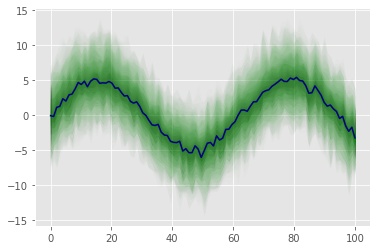

In [51]:
tsplot(t, y, n=100, percentile_min=2.5, percentile_max=97.5, plot_median=True, plot_mean=False, color='g', line_color='navy')
#plt.savefig("out.png")

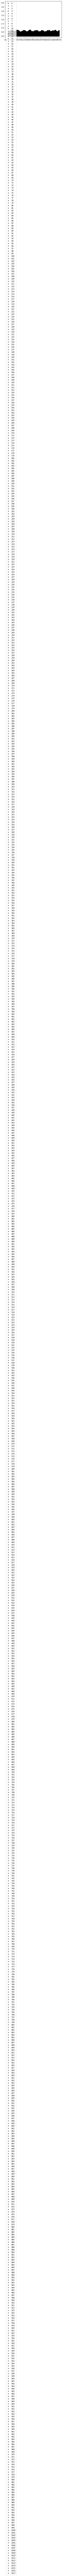

In [17]:

txdailylongsimp.plot(style='k.')
tsplot((data=data), percentile_min=2.5, percentile_max=97.5, plot_median=True, plot_mean=False, color='g', line_color='navy')
#    pyplot.show()

In [21]:
#txdailylong.plot(style='k.')
#pyplot.show()
#txdailylongsimp = txdailylong.drop(['ID', 'alive', 'dead'])
#txdailylongsimp
txdailylongsimp['Quartile'].plot()
#sns.relplot(x="Spring Average LVOD Accumulation", y="Spring 2011 LVOD Accumulation", hue="Quartile", size="dead",
 #          alpha=1, height=10, sizes=(10, 200), data=txdailylong)

KeyError: 'Quartile'

In [40]:
import seaborn
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot') # this was just used for the examples
tsplot(t, y, n=5, percentile_min=2.5, percentile_max=97.5, plot_median=True, plot_mean=False, color='g', line_color='navy')

NameError: name 'txdailyq1' is not defined

In [38]:
#  transpose to long format?? neccessary to transpose- can i avoid long format-- it's kind of complicated...
#txdailylong = Tx_daily.T
#txdailylong

#Tx_dailyQ1 = Tx_daily[Tx_daily.Quartile == 1]
Tx_dailyQ1simpT = Tx_dailyQ1simp.T
#Tx_dailyQ1Tsimp = Tx_dailyQ1T.drop(['ID', 'alive', 'dead', 'quartile'])
Tx_dailyQ1simpT

ValueError: Cannot specify both 'labels' and 'index'/'columns'

In [ ]:
#going back to graphing individual pixels out of frustration
#Candeath = DesMonthMn11.loc[hican_hideath]
#NoCanDeath = DesMonthMn11.loc[hican_lowdeath]
Tx_daily.set_index(Tx_daily.index).T.plot().legend(loc='center left', title="DESC LVOD", bbox_to_anchor=(1, 0.5))
plt.axis(['2015-01', '2016-01', 0, .9])
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns    
import seaborn.timeseries

def _plot_range_band(*args, central_data=None, ci=None, data=None, **kwargs):
    upper = data.max(axis=0)
    lower = data.min(axis=0)
    #import pdb; pdb.set_trace()
    ci = np.asarray((lower, upper))
    kwargs.update({"central_data": central_data, "ci": ci, "data": data})
    seaborn.timeseries._plot_ci_band(*args, **kwargs)

seaborn.timeseries._plot_range_band = _plot_range_band

cluster_overload = pd.read_csv("TSplot.csv", delim_whitespace=True)
cluster_overload['Unit'] = cluster_overload.groupby(['Cluster','Week']).cumcount()

ax = sns.tsplot(time='Week',value="Overload", condition="Cluster", unit="Unit", data=cluster_overload,
               err_style="range_band", n_boot=0)

In [5]:
#June 6 2019 in desperation.... using the moisy file because projecting, spatial join, nor intersect worked in Arc
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np 
T_dead = pd.read_csv(r"C:\Swenson\Research\Texas_drought\RadarTexas\Variables\Back2Python\TXSMOS_deadalive_Moisy.csv") 
T_dead.set_index(['ID'])
ExplanmonthVOD = pd.read_csv(r"C:/Swenson/Research/Texas_drought/RadarTexas/Variables/FromPython/LVODMonthyMeansNo0s_USA_NLCDcomplete.csv")
ExplanmonthVOD.set_index(['ID'])
TX_monthlyvod_explan = pd.merge(T_dead, ExplanmonthVOD, how='left',on='ID')
TX_monthlyvod_explan.to_csv("C:/Swenson/Research/Texas_drought/RadarTexas/Variables/FromPython/TXMontlyVOD_Explan_Dead&Alive.csv")
TX_monthlyvod_explan

,FID_1,longitude,latitude,alive,dead,Input_FID,ID,Unnamed: 0,NLCDtotalArea,NLCDComplete,...,2017-09-30 00:00:00,2017-10-31 00:00:00,2017-11-30 00:00:00,2017-12-31 00:00:00,2018-01-31 00:00:00,2018-02-28 00:00:00,2018-03-31 00:00:00,2018-04-30 00:00:00,2018-05-31 00:00:00,2018-06-30 00:00:00
0,0,-100.245,28.053,0.747620,0.007788,11309,11310,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,-100.245,28.275,0.790883,0.011684,11310,11311,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,-100.245,28.498,0.765132,0.014994,11311,11312,3479.0,586000000.0,0.9376,...,0.154496,0.184576,0.194463,0.180418,0.169841,0.173040,0.141315,0.121179,0.113261,0.099484
3,3,-100.245,28.720,0.851679,0.026680,11312,11313,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,-100.245,28.944,0.802776,0.080726,11313,11314,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,-100.245,29.167,0.811368,0.096075,11314,11315,3480.0,625000000.0,1.0000,...,0.239361,0.246242,0.251994,0.250535,0.243919,0.250092,0.233963,0.211433,0.195374,0.212729
6,6,-100.245,29.391,0.888248,0.299845,11315,11316,3481.0,625000000.0,1.0000,...,0.307454,0.301438,0.302464,0.307349,0.325631,0.328015,0.300290,0.292198,0.274613,0.282037
7,7,-100.245,29.616,0.960341,0.266249,11316,11317,3482.0,625000000.0,1.0000,...,0.307773,0.301349,0.300172,0.299965,0.297592,0.298676,0.292133,0.281441,0.291336,0.283892
8,8,-100.245,29.841,0.930412,0.400354,11317,11318,3483.0,627000000.0,1.0032,...,0.255685,0.264264,0.263788,0.240270,0.247018,0.228941,0.231928,0.229386,0.242519,0.231040
9,9,-100.245,30.067,0.806155,0.146455,11318,11319,3484.0,626000000.0,1.0016,...,0.210509,0.227456,0.226828,0.208130,0.211761,0.207186,0.203316,0.197485,0.203546,0.208268


In [7]:
ExplanmonthVOD


,Unnamed: 0,ID,NLCDtotalArea,NLCDComplete,ForPercPix414243,F_evPerc42,F_DecdPerc41,F_mxPerc43,ShurbPerc52,GrassPerc7181,...,2017-09-30 00:00:00,2017-10-31 00:00:00,2017-11-30 00:00:00,2017-12-31 00:00:00,2018-01-31 00:00:00,2018-02-28 00:00:00,2018-03-31 00:00:00,2018-04-30 00:00:00,2018-05-31 00:00:00,2018-06-30 00:00:00
0,0,881,628000000,1.0048,0.886943,0.772293,0.001592,0.113057,0.054140,0.022293,...,0.681979,0.684235,0.674167,0.625487,0.621995,0.647586,0.688208,0.645808,0.622960,0.648506
1,1,882,625000000,1.0000,0.854400,0.804800,0.000000,0.049600,0.094400,0.025600,...,0.745041,0.695412,0.679866,0.699499,0.678824,0.715213,0.730776,0.686352,0.655348,0.674061
2,2,883,626000000,1.0016,0.845048,0.790735,0.000000,0.054313,0.091054,0.020767,...,0.635942,0.629082,0.616943,0.619441,0.609072,0.574235,0.610717,0.619312,0.605432,0.573868
3,3,900,620000000,0.9920,0.611290,0.551613,0.037097,0.022581,0.204839,0.059677,...,NaN,NaN,0.480782,0.520161,0.527009,0.565182,0.492116,0.462953,NaN,NaN
4,4,987,626000000,1.0016,0.755591,0.646965,0.060703,0.047923,0.121406,0.079872,...,0.642255,0.725334,0.673045,0.687138,0.685834,0.678102,0.707692,0.681623,0.704357,0.728508
5,5,988,628000000,1.0048,0.785032,0.702229,0.047771,0.035032,0.095541,0.070064,...,0.697006,0.672533,0.675292,0.689884,0.679162,0.687449,0.681165,0.679162,0.694265,0.694410
6,6,989,625000000,1.0000,0.670400,0.526400,0.088000,0.056000,0.158400,0.163200,...,0.625827,0.609975,0.578650,0.642199,0.623621,0.626589,0.588207,0.577844,0.601131,0.599330
7,7,990,627000000,1.0032,0.802233,0.668262,0.052632,0.081340,0.116427,0.047847,...,NaN,NaN,NaN,NaN,NaN,0.654301,0.654301,NaN,NaN,NaN
8,8,991,626000000,1.0016,0.870607,0.738019,0.035144,0.097444,0.079872,0.028754,...,0.575450,NaN,NaN,0.597333,0.585333,0.576024,0.596519,NaN,NaN,NaN
9,9,992,625000000,1.0000,0.891200,0.747200,0.033600,0.110400,0.060800,0.022400,...,0.668163,0.692235,0.607761,0.632275,0.643765,0.664413,0.651437,0.617994,0.576244,0.619568


ValueError: Could not interpret input 'n2011'

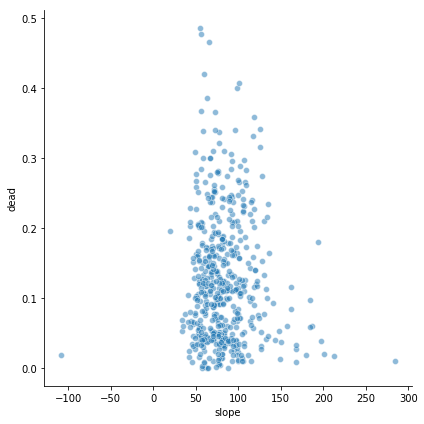

In [3]:
sns.relplot(x="slope", y="dead", alpha=.5, height=6, data=Tlvod_explan)
#sns.relplot(x="dead", y="slope", alpha=.5, height=5, hue="rvalue",data=Tlvod_explan)
sns.relplot(x="n2011", y="ForPercPix414243", alpha=.5, height=5, hue="dead",data=Tlvod_explan)

#sns.relplot(x="dead", y="slope", alpha=.5, height=5, hue="SaatMEAN", data=Tlvod_explan)

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
#sns.scatterplot(x=Tlvod_explan["mn2014"], y=Tlvod_explan["SaatMEAN"], 
#                hue=Tlvod_explan["elevRANGE"], palette=cmap)

sns.relplot(x="dead", y="slope", hue="NA_L3NAME",
            alpha=.5, palette="nipy_spectral_r", legend="full",
            height=6, data=Tlvod_explan)

#plt.savefig('Variables\Graphics_seaborn\Biomass_Saatchi_elevrange_colors.jpg', format='jpg', dpi=300)

In [15]:
list(Tlvod_explan)
#list(Tlvod_explan)


#C:\Swenson\Research\Texas_drought\RadarTexas\SMOSmanip\old_TX_SMOSorig\V5_feb2018

['FID_1',
 'longitude',
 'latitude',
 'alive',
 'dead',
 'Input_FID',
 'ID',
 'Unnamed: 0',
 'NLCDtotalArea',
 'NLCDComplete',
 'ForPercPix414243',
 'F_evPerc42',
 'F_DecdPerc41',
 'F_mxPerc43',
 'ShurbPerc52',
 'GrassPerc7181',
 'WetlPerc9195',
 'WetlW90',
 'CropsPerc82',
 'OpenSpacPerc21',
 'DevBarePerc22232431',
 'SnowWatPerc1112',
 'PotWatInterf',
 'US_L4CODE',
 'US_L4NAME',
 'US_L3CODE',
 'US_L3NAME',
 'NA_L3CODE',
 'NA_L3NAME',
 'NA_L2CODE',
 'NA_L2NAME',
 'NA_L1CODE',
 'NA_L1NAME',
 'STATE_NAME',
 'EPA_REGION',
 'L4_KEY',
 'L3_KEY',
 'L2_KEY',
 'L1_KEY',
 'Shape_Leng',
 'Shape_Area',
 'COUNT_x',
 'AREA_x',
 'elevMIN',
 'elevMAX',
 'elevRANGE',
 'elevMEAN',
 'elevSTD',
 'elevSUM',
 'elevVARIETY',
 'elevMAJORITY',
 'elevMINORITY',
 'elevMEDIAN',
 'COUNT_y',
 'AREA_y',
 'SaatMIN',
 'SaatMAX',
 'SaatRANGE',
 'SaatMEAN',
 'SaatSTD',
 'SaatSUM',
 'COUNT_x.1',
 'NCBD_AREA',
 'NCBDMax_TperHa',
 'NCBDRange_TperHa',
 'NCBDMean_TperHa',
 'NCBDSTD_TperHa',
 'NCBD_COV',
 'NCBD_SUM',
 'B_ESAC

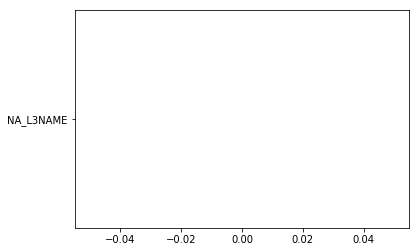

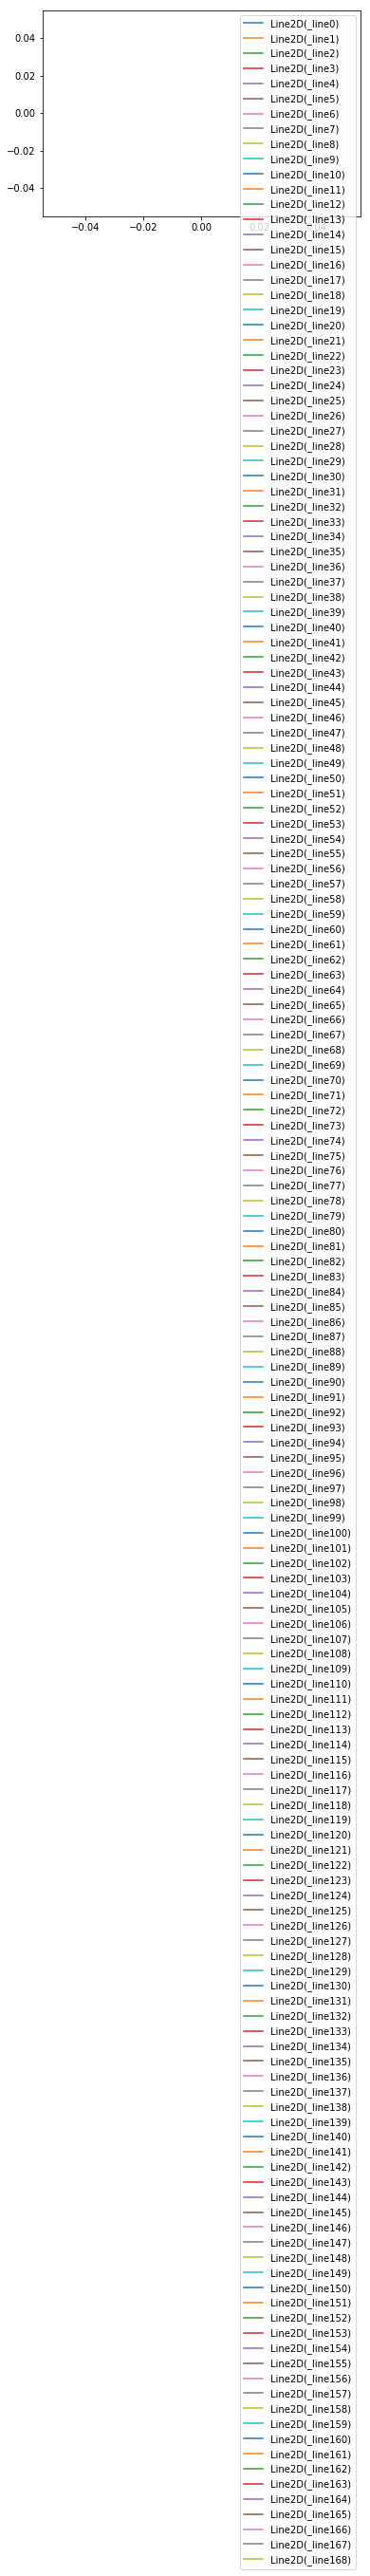

In [29]:
#has all legend categories---   t = TXlvodexplanmonthly.groupby('NA_L3NAME').mean()
#tstd = TXlvodexplanmonthly.groupby('NA_L3NAME').std()
#t[0:10]
#plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
#plt.show()
from cycler import cycler
N = 11
data = t['2010-01-31 00:00:00' :'2018-06-30 00:00:00']
cmap = plt.cm.coolwarm
#axes.prop_cycle = cycler(color='bgrcmyk')
plt.plot('NA_L3NAME')
fig, ax = plt.subplots()
lines = ax.plot(data)
ax.legend(lines)

## select first

In [ ]:
#e.g. from stackexchange- using arrays
dsloc1 = ds1.sel(time='2008-02-10',longitude=2.2,latitude=48.7,method='nearest')
dsloc2 = ds2.sel(time='2008-02-10',longitude=2.2,latitude=48.7,method='nearest')
#then plot
dsloc1['v100'].plot.line('b-',figsize=(15,10))
dsloc2['v100'].plot.line('y-')

In [ ]:
# not sure what this is-- idenitifying outliers/smoothing?
import pandas as pd, numpy as np 
import matplotlib.pyplot as plt 
#seabourne as sns

# 1 Import.csv originals- all rows included; #cols orig is: 26790,3095 Rows & Cols# start at zero  ID is my ID
alvod = pd.read_csv(r"C:/Swenson/Research/Texas_drought/RadarTexas/SMOSmanip/RadarUSA/SMOSorig/ASC_Daily_LVOD_1020_2018F.csv")
dlvod = pd.read_csv(r"C:/Swenson/Research/Texas_drought/RadarTexas/SMOSmanip/RadarUSA/SMOSorig/DES_Daily_LVOD_1020_2018F.csv")

dlvod[0:120]
alvod.sort_values('ID')
#start autoindex at 1 to be the same as SMOS ID  and set keyfields

spike_cols = [col for col in df.columns if 'spike' in col]

print(df[[x for x in df.columns if "_CLOSE" in x]])

df.loc[df['column_name'] == some_value]

def select(data, sim_nr):
    sim = data[sim_nr]
    return(sim)

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
#must haveat the beginning: %matplotlib inline 
lvodnonan[lvodnonan.columns].plot.scatter('LVOD_20160226', 'LVOD_20161026')

In [ ]:
#line graph
#T transposes if data is in rows
pylab.plot(lvod_roll.T, 'r*')

plt.plot([lvod_roll]year, pop_pakistan, color='g')
plt.plot(year, pop_india, color='orange')
plt.xlabel('Countries')
plt.ylabel('Population in million')
plt.title('Pakistan India Population till 2010')
plt.show()

In [ ]:
#plotting  #example of how to plot in jupyter notebooks--- https://www.neonscience.org/neon-aop-hdf5-tile-py
import matplotlib.pyplot as plt, 
%matplotlib inline 

plt.plot
plt.show()

figure = plt.figure(figsize=(6,9), dpi=100);    
graph = figure.add_subplot(111);
# fudging here- what do I want to graph? histogram? or averages by day?
graphmissing = figure.add_subplot(111)
y = graphmissing.bar([0], freq[numpy.NaN]) #gives a bar for the number of missing values at x=0

figure.show()

### grouping by means

In [41]:
#print(l2016)

#print(explan)
#AnnlvodExp = pd.concat([explan, mn2010, mn2011, mn2012, mn2013, mn2014, mn2015, mn2016, mn2017], axis=1)
print(AnnlvodExp)

         ID  NLCDtotalArea  NLCDComplete  ForPercPix414243  F_evPerc42  \
0       788      626000000        1.0016          0.712460    0.648562   
1       874      626000000        1.0016          0.742812    0.659744   
2       875      611000000        0.9776          0.680851    0.561375   
3       881      628000000        1.0048          0.886943    0.772293   
4       882      625000000        1.0000          0.854400    0.804800   
5       883      626000000        1.0016          0.845048    0.790735   
6       884      627000000        1.0032          0.505582    0.301435   
7       885      626000000        1.0016          0.498403    0.268371   
8       900      620000000        0.9920          0.611290    0.551613   
9       901      626000000        1.0016          0.829073    0.809904   
10      902      626000000        1.0016          0.897764    0.849840   
11      987      626000000        1.0016          0.755591    0.646965   
12      988      628000000        1.00

## what happened to the id!?

In [31]:
import pandas as pd, numpy as np 
import matplotlib.pyplot as plt 
#seabourne as sns
#to remove past/present variables and clean up %reset

# 1 Import.csv originals- all rows included; #cols orig is: 26790,3095 Rows & Cols# start at zero  ID is my ID
#alvod = pd.read_csv(r"C:/Swenson/Research/Texas_drought/RadarTexas/SMOSmanip/RadarUSA/SMOSorig/ASC_Daily_LVOD_1020_2018F.csv")

#alvod.set_index(['ID'])

#alvod[0:120]
#dlvod = pd.read_csv(r"C:/Swenson/Research/Texas_drought/RadarTexas/SMOSmanip/RadarUSA/SMOSorig/DES_Daily_LVOD_1020_2018F.csv")
#rmsealvod = pd.read_csv(r"C:/Swenson/Research/Texas_drought/RadarTexas/SMOSmanip/RadarUSA/SMOSorig/ASC_Daily_RMSE_1020_2018F.csv")
#rmsedlvod = pd.read_csv(r"C:/Swenson/Research/Texas_drought/RadarTexas/SMOSmanip/RadarUSA/SMOSorig/Orig_noZeros/DES_Daily_RMSE_1020_2018F.csv")

#set keyfields
#alvod.set_index(['ID'])
#dlvod.set_index(['ID'])
#lvod = pd.concat([dlvod, alvod]).groupby(level=0).mean()
dlvod.index = np.arange(1, len(dlvod) + 1)
dlvod[0:120]



,Lat,lon,ID,20100112,20100113,20100114,20100115,20100116,20100117,20100118,...,20180621,20180622,20180623,20180624,20180625,20180626,20180627,20180628,20180629,20180630
1,23.063156,-125.922188,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,23.276089,-125.922188,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23.489353,-125.922188,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23.702955,-125.922188,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,23.916901,-125.922188,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,24.131193,-125.922188,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,24.345837,-125.922188,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,24.560837,-125.922188,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,24.776197,-125.922188,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,24.991924,-125.922188,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#lvodnonan = lvod.dropna(thresh=(len(lvod.columns) - 3091))
#lvodnonan[0:10]
var_list0 = lvodnonan.columns.values.tolist()
var_list = var_list0[0:len(var_list0)]
var_list[0:10]



['Lat',
 'lon',
 'ID',
 '20100112',
 '20100113',
 '20100114',
 '20100115',
 '20100116',
 '20100117',
 '20100118']

In [28]:

#tlvod = lvodnonan[var_list].transpose()
tlvod[0:120]



,110,224,562,563,677,880,881,882,883,884,...,26765,26767,26772,26773,26774,26775,26780,26781,26782,26789
Lat,50.049885,50.049885,48.852192,49.148922,49.148922,42.175476,42.439117,42.703857,42.969715,43.236710,...,44.044731,44.589497,45.974083,46.255093,46.537533,46.821430,48.263878,48.557190,48.852192,50.967892
lon,-125.922188,-125.662826,-124.884727,-124.884727,-124.625359,-124.106628,-124.106628,-124.106628,-124.106628,-124.106628,...,-65.230545,-65.230545,-65.230545,-65.230545,-65.230545,-65.230545,-65.230545,-65.230545,-65.230545,-65.230545
ID,111.000000,225.000000,563.000000,564.000000,678.000000,881.000000,882.000000,883.000000,884.000000,885.000000,...,26766.000000,26768.000000,26773.000000,26774.000000,26775.000000,26776.000000,26781.000000,26782.000000,26783.000000,26790.000000
20100112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20100113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20100114,0.741297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20100115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20100116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20100117,0.588035,0.539156,NaN,NaN,NaN,NaN,NaN,NaN,0.596700,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20100118,0.200787,NaN,NaN,0.271149,0.201113,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
nlcd = pd.read_csv(r"C:/Swenson/Research/Texas_drought/RadarTexas/Variables/Back2Python/TabAreaUS_SMOS_TabArea_NLCD2011_2albSMOS.csv")
nlcd.set_index(['ID'])
ecoreg = pd.read_csv(r"C:/Swenson/Research/Texas_drought/RadarTexas/Variables/Back2Python/EPAEcoregs_states.csv")
ecoreg.set_index(['ID'])
#elev = pd.read_csv(r"C:/Swenson/Research/Texas_drought/RadarTexas/Variables/Back2Python/Elev_SMOS_Zonal.csv")
#elev.set_index(['ID'])
#canht = pd.read_csv(r"C:/Swenson/Research/Texas_drought/RadarTexas/Variables/Back2Python/TabArea_LandFireCanHt_SMOSThAlb83.csv")
#canht.set_index(['ID'])
bioncbd = pd.read_csv(r"C:/Swenson/Research/Texas_drought/RadarTexas/Variables/Back2Python/US_SMOS_NCBDBiomass2001Zonalstats.csv")
bioncbd.set_index(['ID'])
biosaatchi = pd.read_csv(r"C:/Swenson/Research/Texas_drought/RadarTexas/Variables/Back2Python/US_SMOS_Saatich1k2015BiomassAlb_Zonal24jan.csv")
biosaatchi.set_index(['ID'])
bioglob = pd.read_csv(r"C:/Swenson/Research/Texas_drought/RadarTexas/Variables/Back2Python/US_SMOS_globiomESA1kAlb_zonalJan2019.csv")
bioglob.set_index(['ID'])
bioblack = pd.read_csv(r"C:/Swenson/Research/Texas_drought/RadarTexas/Variables/Back2Python/BlackardBiomass_Zonal.csv")
bioblack.set_index(['ID'])
#join all explvars into 1 file based on ID  orig: explan = pd.merge(nlcd, ecoreg,).drop(),on = 'ID'
explan = nlcd.merge(ecoreg,on='ID').merge(bioncbd,on='ID').merge(biosaatchi,on='ID').merge(bioglob,on='ID').merge(bioblack, on='ID')
#merge(canht,on='ID').

#join with lvod                           
lvod_explan = pd.merge(explan, lvod_rollmed, how='left', on='ID')
#print(lvod_explan)

# 8 Filtering the dataset for analysis
lvodnoWet8perc = lvod_explan[(lvod_explan.NLCDComplete > .95) & (lvod_explan.PotWatInterf < 0.10) 
lvodnoWet8perc.to_csv("C:/Swenson/Research/Texas_drought/RadarTexas/Variables/FromPython/LVOD_USA_NLCD95perc_potwatinterf8perc.csv")

ecoreg_group = lvodnoWet8perc.groupby(['US_L3CODE']).mean()
#print(ecoreg_group)
ecoreg_group.to_csv("C:/Swenson/Research/Texas_drought/RadarTexas/Variables/LVOD_ecoreg_group.csv") 


SyntaxError: invalid syntax (<ipython-input-35-ad5115fdae0d>, line 27)